In [1]:
from IPython.display import Image
Image(url= "https://media.istockphoto.com/photos/family-financial-management-mortgage-and-payday-loan-or-cash-advance-picture-id1058480452?k=20&m=1058480452&s=612x612&w=0&h=iJnPMJFY3VKvGy9LfB61o8gVnxk9ewS_9Ig6O-WNV18=", width=900, height=400)

### <u>Business Understanding</u>

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- <mark>If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company</mark>

- <mark>If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.</mark>

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

- **The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- **All other cases:** All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

1. **Approved:** The Company has approved loan Application

2. **Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

3. **Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

4. **Unused offer:**  Loan has been cancelled by the client but on different stages of the process.


### 1. Importing the Libraries

In [2]:
# Pandas and Numpy
import pandas as pd
import numpy as np

# Matplotlib and Seaborn for Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly
from plotly import tools
import plotly.express as px


# Filtering out warnings
import warnings
warnings.filterwarnings("ignore")

# displaying the maximum columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns',None)

### 2. Loading the Datasets using Pandas

**Naming convention**

1. df1 ==> application_data.csv
2. df2 ==> previous_application.csv

In [3]:
# Changing the right Directory for accessing the Datasets
%cd desktop\eda case study

[WinError 3] The system cannot find the path specified: 'desktop\\eda case study'
C:\Users\HP\Exploratory Data Analysis


In [4]:
# Reading the 2 datasets - application_data.csv & previous_application.csv

df1 = pd.read_csv("application_data.csv")
df2 = pd.read_csv("previous_application.csv")

In [5]:
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250         0.0375                 0.0205           0.0193                    0.0000                0.00   reg oper account  block of flats          0.0149       Stone, brick       

In [6]:
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

### 3. Data Cleaning - Application Data

<b><u>Steps Involved</u></b>

1. Checking the Data types of each column.
2. Analysing the Missing values.
3. Dropping the Columns with missing values
4. Imputing the missing values

#### 3.1 Checking if each column is of right Data Type

In [7]:
# Number or Rows and Columns in the Dataset
print('Number of Rows in Dataset - application_data.csv --> ',df1.shape[0])
print('Number of Columns in Dataset - application_data.csv --> ',df1.shape[1])

Number of Rows in Dataset - application_data.csv -->  307511
Number of Columns in Dataset - application_data.csv -->  122


In [8]:
# info & Datatypes of the columns in the Dataset
df1.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
# Describe
df1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.00000

#### 3.2 Analysing the Missing values

In [10]:
# Defining a function to list out the Missing values

def prcnt_missing(df):
    return round(df.isnull().sum()/len(df)*100,2)

In [11]:
# Missing Values % in Dataset Application data
prcnt_missing(df1)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

#### 3.3 Dropping the Columns with missing values¶

<mark>For the Analytics purpose, we are considering Threshold of **50%** for the Missing values.</mark>

If the % of Missing values is greater than the Threshold then the respective column is dropped to ease the Analytics process

In [12]:
# Checking columns having more than 50% of missing values

print(prcnt_missing(df1)[prcnt_missing(df1) > 50])
print("Number of Columns ",prcnt_missing(df1)[prcnt_missing(df1) > 50].count())

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [13]:
# Column Names list with more than 50 % missing values

drop_cols = list(prcnt_missing(df1)[prcnt_missing(df1) > 50].index)
print(drop_cols)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [14]:
# Dropping columns from drop_cols list from the Dataset Application_data

df1.drop(columns=drop_cols,inplace=True)

In [15]:
# Checking the shape of the Dataset after dropping the columns

print('''Number of columns in dataset df1 after dropping columns
:''',df1.shape[1])

Number of columns in dataset df1 after dropping columns
: 81


In [16]:
print(df1.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
     

#### 3.4 Imputing the Missing Values

In [17]:
# Missing values for the remaining columns
prcnt_missing(df1)[prcnt_missing(df1)>0].sort_values(ascending=False)

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
NAME_TYPE_SUITE                  0.42
DEF_60_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_30_CNT_SOCIAL_CIRCLE         0.33
EXT_SOURCE_2                     0.21
AMT_GOODS_PRICE                  0.09
dtype: float64

The Next step is to Impute the Missing Values For the above listed Columns 👆, with either Mean / Median for Numerical Columns and Mode for Categorical based on the Values

In [18]:
# Adding all the Columns with still Missing Values in Application Data set to a list - Null_Columns

Null_Columns = list(prcnt_missing(df1)[prcnt_missing(df1)>0].sort_values(ascending=False).index)
print(Null_Columns)

['FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_TYPE_SUITE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE']


Splitting the Null_Column list into 2, based on the Data type of the Column

In [19]:
# Column with Numerical data
Numerical_List = []
for i in Null_Columns:
    if df1[i].dtype == int or df1[i].dtype == float:
        Numerical_List.append(i)
print(Numerical_List)

['FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE']


For Imputing the Missing values in Numerical Dtype columns, we have 2 options:

1. Using Median - when there is an Outlier in the Column data
2. Using Mean - when there is no significant outlier int he Column data

#### 3.4.1 Imputing Missing values with Median

In [20]:
# Adding all the Columns with outliers in a new list Median_list

Median_List = []
for i in Numerical_List:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    # print(Q1, Q3, IQR, upper, lower)
    if (df1[i].max() - upper != 0) or (abs(df1[i].min()) - abs(lower)!= 0):
        Median_List.append(i)

print(Median_List)

['FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE']


In [21]:
# Filling NA / Missing values with Median value

for i in Median_List:
    df1[i].fillna(df1[i].median(), inplace = True)

In [22]:
# Checking the Missing value percentage after Imputing
prcnt_missing(df1[Median_List])

FLOORSMAX_AVG                   0.0
FLOORSMAX_MODE                  0.0
FLOORSMAX_MEDI                  0.0
YEARS_BEGINEXPLUATATION_AVG     0.0
YEARS_BEGINEXPLUATATION_MODE    0.0
YEARS_BEGINEXPLUATATION_MEDI    0.0
TOTALAREA_MODE                  0.0
EXT_SOURCE_3                    0.0
AMT_REQ_CREDIT_BUREAU_HOUR      0.0
AMT_REQ_CREDIT_BUREAU_QRT       0.0
AMT_REQ_CREDIT_BUREAU_MON       0.0
AMT_REQ_CREDIT_BUREAU_WEEK      0.0
AMT_REQ_CREDIT_BUREAU_DAY       0.0
AMT_REQ_CREDIT_BUREAU_YEAR      0.0
DEF_60_CNT_SOCIAL_CIRCLE        0.0
OBS_60_CNT_SOCIAL_CIRCLE        0.0
DEF_30_CNT_SOCIAL_CIRCLE        0.0
OBS_30_CNT_SOCIAL_CIRCLE        0.0
EXT_SOURCE_2                    0.0
AMT_GOODS_PRICE                 0.0
dtype: float64

#### 3.4.2 Imputing Missing values with Mean

In [23]:
# Adding all the Columns with outliers in a new list Mean_list

Mean_list = []
for i in Numerical_List:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    # print(Q1, Q3, IQR, upper, lower)
    if (df1[i].max() - upper == 0) or (abs(df1[i].min()) - abs(lower)== 0):
        Mean_list.append(i)

print(Mean_list)

['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']


In [24]:
# Filling NA / Missing values with Mean value

for i in Mean_list:
    df1[i].fillna(df1[i].mean(), inplace = True)

In [25]:
# Checking the Missing value percentage after Imputing
prcnt_missing(df1[Mean_list])

AMT_REQ_CREDIT_BUREAU_HOUR    0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
DEF_60_CNT_SOCIAL_CIRCLE      0.0
DEF_30_CNT_SOCIAL_CIRCLE      0.0
dtype: float64

In [26]:
# Checking the Missing value percentage after Imputing in the Numerical list

prcnt_missing(df1[Numerical_List])

FLOORSMAX_AVG                   0.0
FLOORSMAX_MODE                  0.0
FLOORSMAX_MEDI                  0.0
YEARS_BEGINEXPLUATATION_AVG     0.0
YEARS_BEGINEXPLUATATION_MODE    0.0
YEARS_BEGINEXPLUATATION_MEDI    0.0
TOTALAREA_MODE                  0.0
EXT_SOURCE_3                    0.0
AMT_REQ_CREDIT_BUREAU_HOUR      0.0
AMT_REQ_CREDIT_BUREAU_QRT       0.0
AMT_REQ_CREDIT_BUREAU_MON       0.0
AMT_REQ_CREDIT_BUREAU_WEEK      0.0
AMT_REQ_CREDIT_BUREAU_DAY       0.0
AMT_REQ_CREDIT_BUREAU_YEAR      0.0
DEF_60_CNT_SOCIAL_CIRCLE        0.0
OBS_60_CNT_SOCIAL_CIRCLE        0.0
DEF_30_CNT_SOCIAL_CIRCLE        0.0
OBS_30_CNT_SOCIAL_CIRCLE        0.0
EXT_SOURCE_2                    0.0
AMT_GOODS_PRICE                 0.0
dtype: float64

#### 3.4.3 Imputing the Missing values with Mode for Categorical data types

In [27]:
object_list = []
for i in Null_Columns:
    if df1[i].dtype == object :
        object_list.append(i)
print(object_list)

['EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE']


For Missing value treatment of the 👆 above columns, lets check the columns individually

**OCCUPATION_TYPE**

In [28]:
# Checking the Value counts in these data types

print(df1['OCCUPATION_TYPE'].value_counts())
print()
print('Number of Missing Values:',df1['OCCUPATION_TYPE'].isnull().sum())

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

Number of Missing Values: 96391


☝ Since there are around 96k Missing values in the Occupation_type column, imputing it with mode which will be **Laborers** doesnt make sense, so instead imputing the missing value to **Unknown**.

In [29]:
df1['OCCUPATION_TYPE'] = df1['OCCUPATION_TYPE'].fillna('Unknown')

In [30]:
df1.OCCUPATION_TYPE.isnull().sum()

0

In [31]:
df1.OCCUPATION_TYPE.value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

**NAME_TYPE_SUITE**

In [32]:
print(df1['NAME_TYPE_SUITE'].value_counts())
print()
print('Number of Missing Values:',df1['NAME_TYPE_SUITE'].isnull().sum())

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Number of Missing Values: 1292


In [33]:
# Imputing the ☝ above column with Mode value i.e. Unaccompanied

df1['NAME_TYPE_SUITE'] = df1['NAME_TYPE_SUITE'].fillna(df1['NAME_TYPE_SUITE'].mode()[0])

In [34]:
df1.NAME_TYPE_SUITE.isnull().sum()

0

In [35]:
df1.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

**EMERGENCYSTATE_MODE**

In [36]:
print(df1['EMERGENCYSTATE_MODE'].value_counts())
print()
print('Number of Missing Values:',df1['EMERGENCYSTATE_MODE'].isnull().sum())

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

Number of Missing Values: 145755


As this Above column just describes the - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Dropping the above column, to improve the analysis

In [37]:
df1 = df1.drop(['EMERGENCYSTATE_MODE'], axis = 1)

In [38]:
# Checking Missing Values in Object list

prcnt_missing(df1)

SK_ID_CURR                      0.0
TARGET                          0.0
NAME_CONTRACT_TYPE              0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY                 0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT                      0.0
AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.0
NAME_TYPE_SUITE                 0.0
NAME_INCOME_TYPE                0.0
NAME_EDUCATION_TYPE             0.0
NAME_FAMILY_STATUS              0.0
NAME_HOUSING_TYPE               0.0
REGION_POPULATION_RELATIVE      0.0
DAYS_BIRTH                      0.0
DAYS_EMPLOYED                   0.0
DAYS_REGISTRATION               0.0
DAYS_ID_PUBLISH                 0.0
FLAG_MOBIL                      0.0
FLAG_EMP_PHONE                  0.0
FLAG_WORK_PHONE                 0.0
FLAG_CONT_MOBILE                0.0
FLAG_PHONE                      0.0
FLAG_EMAIL                      0.0
OCCUPATION_TYPE             

#### 3.5 Replacing the XNA & XAP values with NAN

In [39]:
df1 = df1.replace('XNA',np.NaN)
df1 = df1.replace('XAP',np.NaN)

### 4. Normalizing and Bucketing Columns

The following columns are being Normalized by adding new columns and binning certain values in suitable buckets for easing the Analysis process.

1. DAYS_BIRTH
2. DAYS_EMPLOYED
3. AMT_INCOME_TOTAL
4. AMT_CREDIT
5. EXT_SOURCE_2 & EXT_SOURCE_3

#### 4.1 DAYS_BIRTH

1. Creating a new column to contain the *DAYS_BIRTH* values in unit 'years'.
2. Binning and bucketing values.

In [40]:
# creating a column
df1['AGE (IN YEARS)'] = round(abs(df1['DAYS_BIRTH']/365),2)

In [41]:
df1['AGE (IN YEARS)']

0         25.92
1         45.93
2         52.18
3         52.07
4         54.61
          ...  
307506    25.55
307507    56.92
307508    41.00
307509    32.77
307510    46.18
Name: AGE (IN YEARS), Length: 307511, dtype: float64

In [42]:
# Binning & bucketing Age values
df1['AGE_IN_YEARS_RANGE'] = pd.cut(df1['AGE (IN YEARS)'],bins=[0,20,25,30,35,40,45,50,55,60,65,70],labels=["0-20",'20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','above 65'])

In [43]:
df1.AGE_IN_YEARS_RANGE.value_counts()

35-40       42861
40-45       41396
30-35       39455
45-50       35130
50-55       34952
55-60       33114
25-30       32866
60-65       27476
20-25       12175
above 65     8086
0-20            0
Name: AGE_IN_YEARS_RANGE, dtype: int64

#### 4.2 DAYS_EMPLOYED

1. Creating a new column to contain the *DAYS_EMPLOYED* values in unit 'years'.
2. Binning and bucketing values.

In [44]:
# creating a new column 
df1['YEARS_OF_EMPLOYMENT'] = round(abs(df1['DAYS_EMPLOYED']/365),2)

In [45]:
df1['YEARS_OF_EMPLOYMENT']

0            1.75
1            3.25
2            0.62
3            8.33
4            8.32
           ...   
307506       0.65
307507    1000.67
307508      21.70
307509      13.11
307510       3.46
Name: YEARS_OF_EMPLOYMENT, Length: 307511, dtype: float64

In [46]:
# Binning & bucketing Employment year values
df1['YEARS_OF_EMPLOYMENT_RANGE'] = pd.cut(df1['YEARS_OF_EMPLOYMENT'],bins=[0,5,10,15,20,25,30,35,40,45,50,55],labels=["0-5",'5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45','45-50','above 50'])

#### 4.3 AMT_INCOME_TOTAL

1. Creating a new column to contain the *AMT_INCOME_TOTAL* values in unit 'Lakhs'.
2. Binning and bucketing values.

In [47]:
# creating a new column
df1['INCOME (IN LAKHS)'] = round(df1['AMT_INCOME_TOTAL']/100000,2)

In [48]:
# Binning and bucketing values

df1['INCOME_RANGE'] = pd.cut(df1['INCOME (IN LAKHS)'],bins = [0,1,2,3,4,5,6,7,8,9,10,100], labels = ['0-1L','1-2L','2-3L','3-4L','4-5L','5-6L','6-7L','7-8L','8-9L','9-10L','Above 10L'])

In [49]:
df1.INCOME_RANGE.value_counts()

1-2L         155891
2-3L          65163
0-1L          63721
3-4L          14721
4-5L           5313
5-6L           1095
6-7L            869
8-9L            299
Above 10L       247
7-8L            162
9-10L            27
Name: INCOME_RANGE, dtype: int64

#### 4.4 AMT_CREDIT

1. Creating a new column to contain the *AMT_CREDIT* values in unit 'Lakhs'.
2. Binning and bucketing values.

In [50]:
# creating a new column
df1['CREDIT(IN LAKHS)'] = round(df1['AMT_CREDIT']/100000,2)

In [51]:
# Binning and bucketing values

df1['CREDIT_RANGE'] = pd.cut(df1['CREDIT(IN LAKHS)'],bins = [0,5,10,15,20,25,30,35,40,45], labels = ['0-5L','5-10L','10-15L','15-20L','20-25L','25-30L','30-35L','35-40L','Above 40L'])

In [52]:
df1.CREDIT_RANGE.value_counts()

0-5L         149896
5-10L        107633
10-15L        39226
15-20L         8727
20-25L         1668
25-30L          329
30-35L           18
Above 40L        10
35-40L            4
Name: CREDIT_RANGE, dtype: int64

#### 4.5 EXT_SOURCE_2 & EXT_SOURCE_3 

Since EXT_SOURCE_2 & 3 are client scores from various sources, creating a new column **AVERAGE_RATING** to summarize both and can be used in Analysis.

In [53]:
df1['AVERAGE_RATING'] = (df1['EXT_SOURCE_2'] + df1['EXT_SOURCE_3'])/2

In [54]:
df1['AVERAGE_RATING'].describe()

count    307511.000000
mean          0.515099
std           0.135318
min           0.000269
25%           0.425890
50%           0.532120
75%           0.615340
max           0.840552
Name: AVERAGE_RATING, dtype: float64

#### 4.6 Credit Ratio

Creating a new column **Credit Ratio** an additional parameter describing the requested Credit amount v/s the Total income of the client

### $Credit Ratio = \frac{Credit\,Amount}{Total\,Income}$

In [55]:
df1['Credit_Ratio'] = round(df1.AMT_CREDIT/df1.AMT_INCOME_TOTAL,2)

In [56]:
df1.Credit_Ratio.head()

0    2.01
1    4.79
2    2.00
3    2.32
4    4.22
Name: Credit_Ratio, dtype: float64

In [57]:
df1.Credit_Ratio.describe()

count    307511.000000
mean          3.957585
std           2.689684
min           0.000000
25%           2.020000
50%           3.270000
75%           5.160000
max          84.740000
Name: Credit_Ratio, dtype: float64

### 5. Data Analysis - Application Dataset

The analysis is carried out in the below order.

1. Univariate, checking the proportion of each category across the Datasets.
2. Bivariate & Multivariate, comparing 2 or more that 2 variables to check if there is any correlation or causuation

### 5.1 Univariate Analysis

Defining certain fucntions for Plotting Graphs

In [58]:
#function for plotting Boxplot and Histogram for Numerical Data in Univariate Analysis

def Numerical_box_hist(dataframe, column):
    sns.set(style='darkgrid')
    plt.figure(figsize=(25,5), dpi= 80)
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=dataframe, x=column, orient='h')
    plt.title(f'Box Plot for column {column}',fontdict={'fontsize':16,'fontweight':3})
    
    plt.subplot(1, 3, 2)
    sns.histplot(dataframe[column].dropna(),bins=10)
    plt.title(f'Hist Plot for column {column}',fontdict={'fontsize':16,'fontweight':3})
    plt.show()

In [59]:
#function for plotting horizontal Bar for Numerical Data in Univariate Analysis

def Horizontal_bar(dataframe, column):
    sns.set(style='darkgrid')
    plt.figure(figsize = [12,5])
    dataframe[column].value_counts().plot.barh(width = 0.8)
    plt.title(column)
    plt.show()

In [60]:
# Pie and Bar plotinng funciton
def pie_count(df,column):
    sns.set(style='darkgrid')
    plt.figure(figsize=(10,7), dpi= 80)
    
    plt.subplot(2, 1, 1)
    df[column].value_counts().dropna().plot.pie(autopct = "%1.0f%%")
    plt.title(f"Pie Chart of {column}")
    plt.ylabel("")
    
    ax=plt.subplot(2,1,2)
    df[column].value_counts().plot.bar(width = 0.4)
    plt.title(f"Bar Chart of {column}")
    
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()/len(df1))*100), (p.get_x()+0.2, p.get_height()+100), ha='center')
    
    
    plt.legend()
    
    plt.show()

In [61]:
# countplot function
def countplot(df,column):
    plt.figure(figsize=[20,7])
    ax=df[column].value_counts().plot.bar(width = 0.5)
    plt.title(f"{column} Distribution ",fontdict={'fontsize':20})

    for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()/len(df1))*100), (p.get_x()+0.2, p.get_height()+100), ha='center')


    plt.legend()

    plt.show()

#### 5.1.1 Gender of Applicants

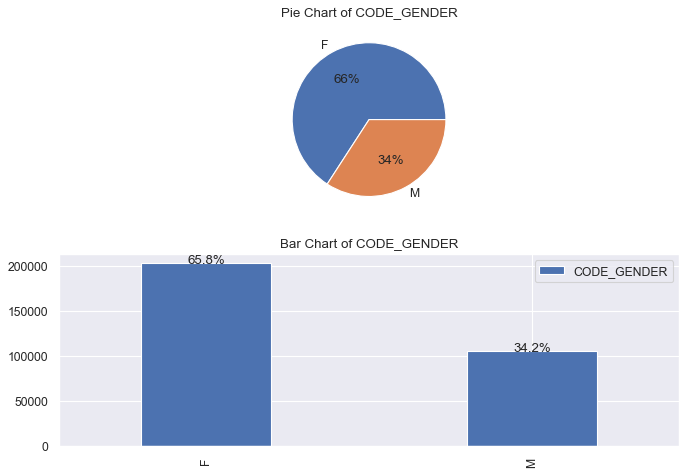

In [62]:
pie_count(df1,'CODE_GENDER')

 #### 💡 Observation:
 - Female applicants are significantly higher (66%) than the Male (34%) applicants.

#### 5.1.2 Applicants Age distribution

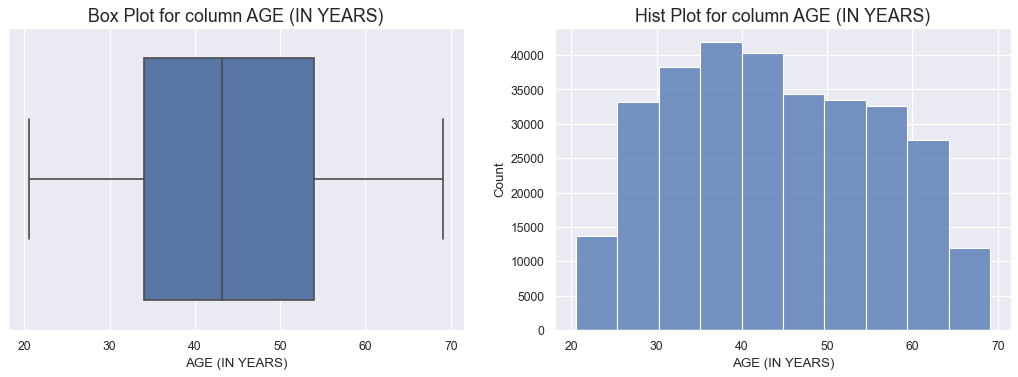

In [63]:
Numerical_box_hist(df1,'AGE (IN YEARS)')

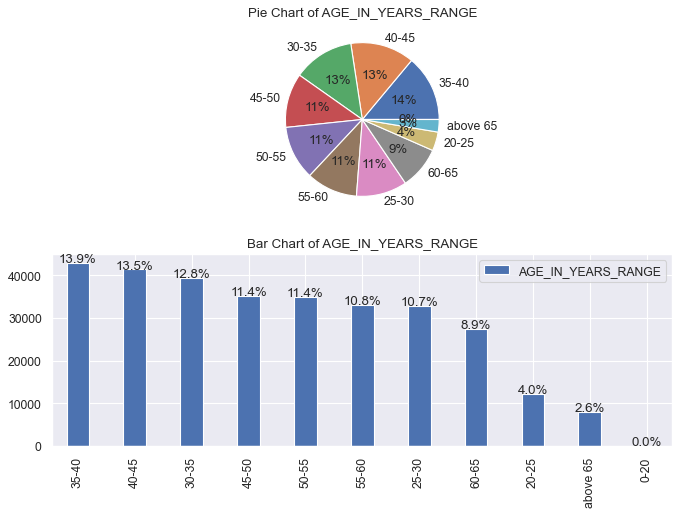

In [64]:
pie_count(df1,'AGE_IN_YEARS_RANGE')

#### 💡 Observation:
- The Age distribution seems to be Unimodal, with maximum proportion of applicants with age ranging from **30-35 (13%)** & **40-45 (13%)**.

#### 5.1.3 Target variable

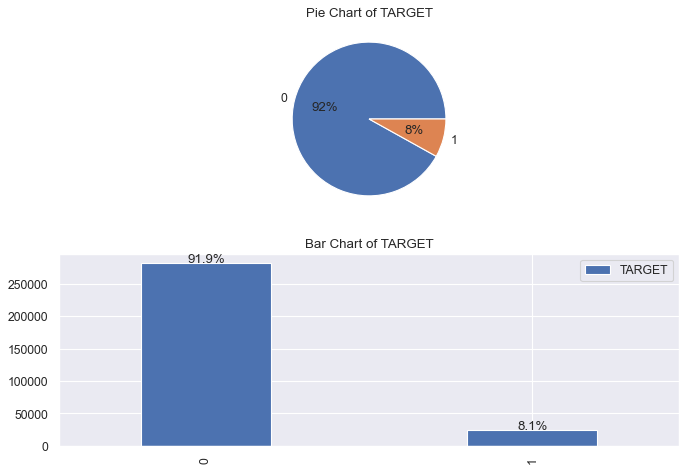

In [65]:
pie_count(df1,'TARGET')

 #### 💡 Observation:
 - The proportion of applicants with payment difficulties is significantly lesser than the others.

#### 5.1.4 Occupatoin distribution

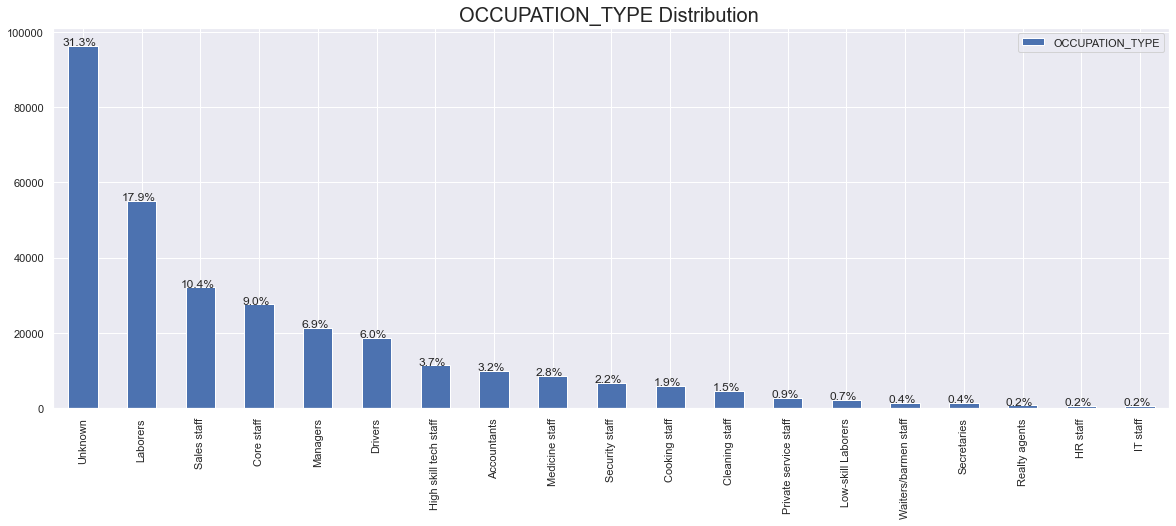

In [66]:
countplot(df1,'OCCUPATION_TYPE')

#### 💡 Observation:
- Laborers make up a significant proportion of the applicants followed by sales staff and core staff (Most of the data regarding in the Occupation_Type was missing and has been imputed with **Unknown**

#### 5.1.5 Family Status distribution

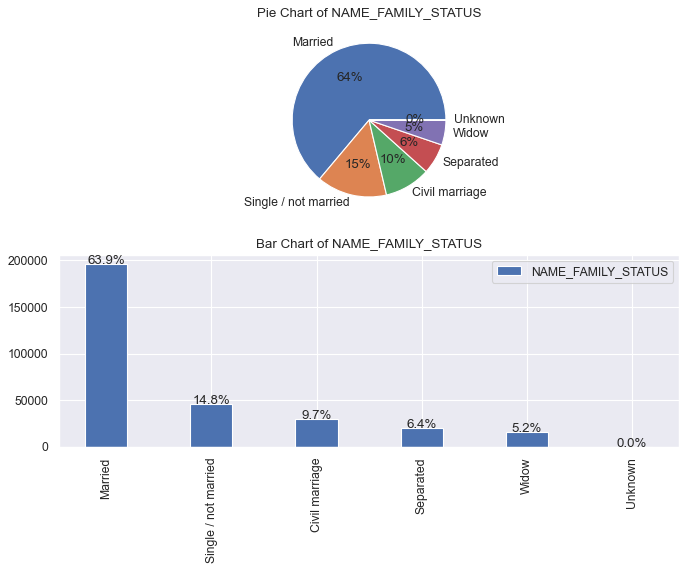

In [67]:
pie_count(df1,'NAME_FAMILY_STATUS')

#### 💡 Observation:
- Major Proportion of the Applicants are **Married (63.9%)** followed by **Single/not married (14.8%)**

#### 5.1.6 Education distribution

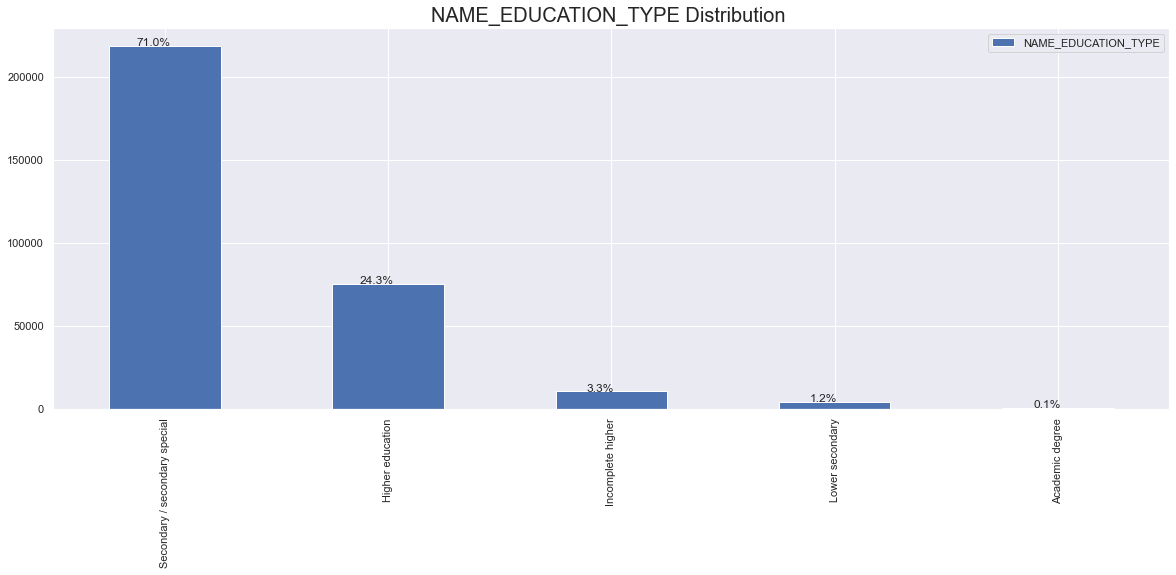

In [68]:
countplot(df1,'NAME_EDUCATION_TYPE')

#### 💡 Observation:
- Majority of the clients have secondary/secondary special education followed by higher education

#### 5.1.7 Count of children

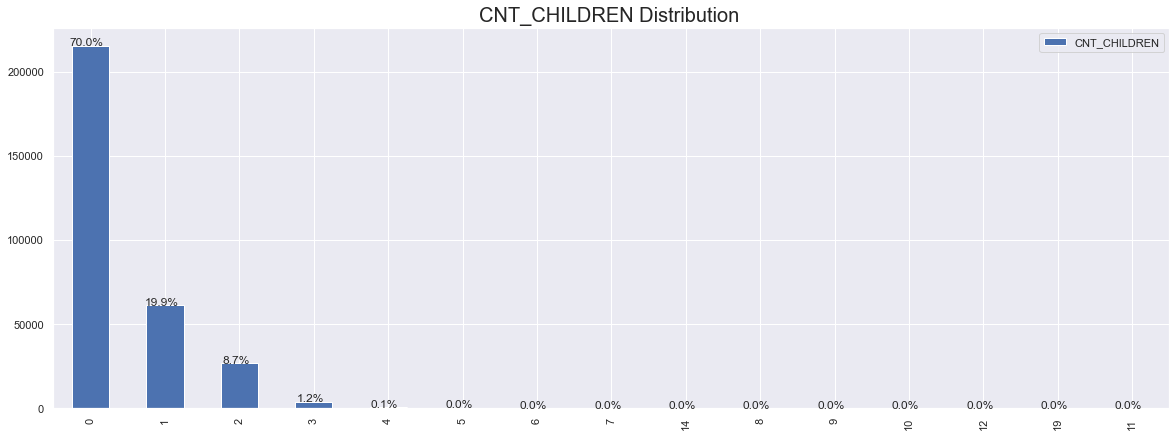

In [69]:
countplot(df1,'CNT_CHILDREN')

#### 💡 Observation:
- Major Proportion of the Applicants (70%) donot have children.
- Around 20% of Applicant have single child.

#### 5.1.8 Car ownership distribution

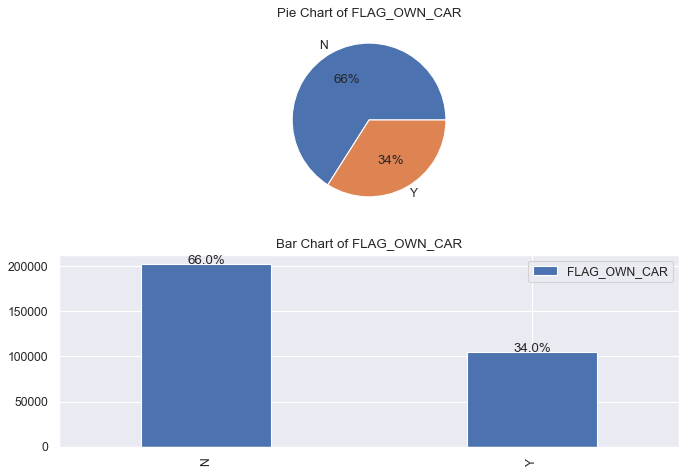

In [70]:
pie_count(df1,'FLAG_OWN_CAR')

#### 💡 Observation:
- Applicants without car (66%) are significantly higher than Applicants with car(34%)

#### 5.1.9 Income

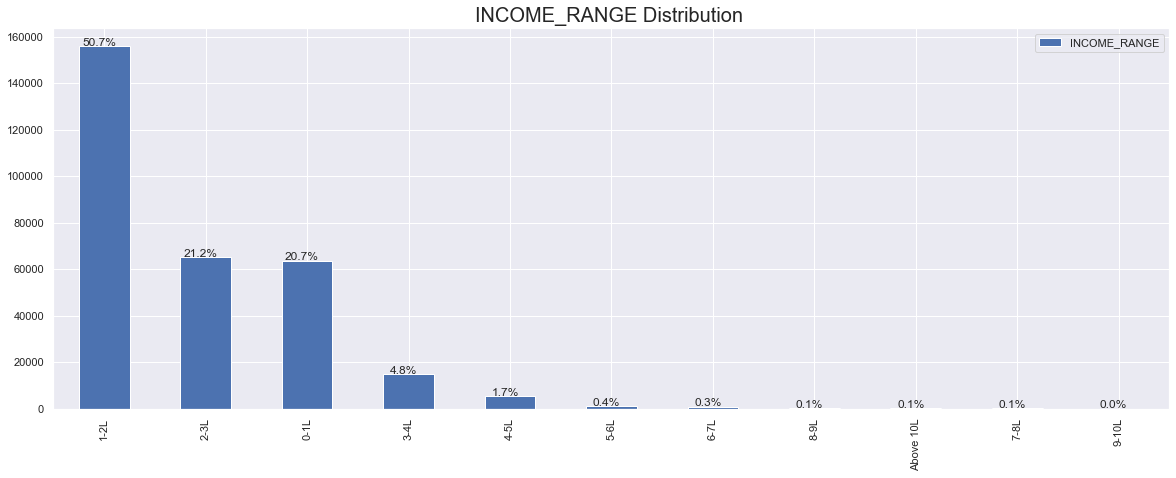

In [71]:
countplot(df1,'INCOME_RANGE')

#### 💡 Observation:
- Major proportion of applicants has Income ranging from **1-2 lakhs (50.7%)** 

#### 5.1.10 Credit Amount

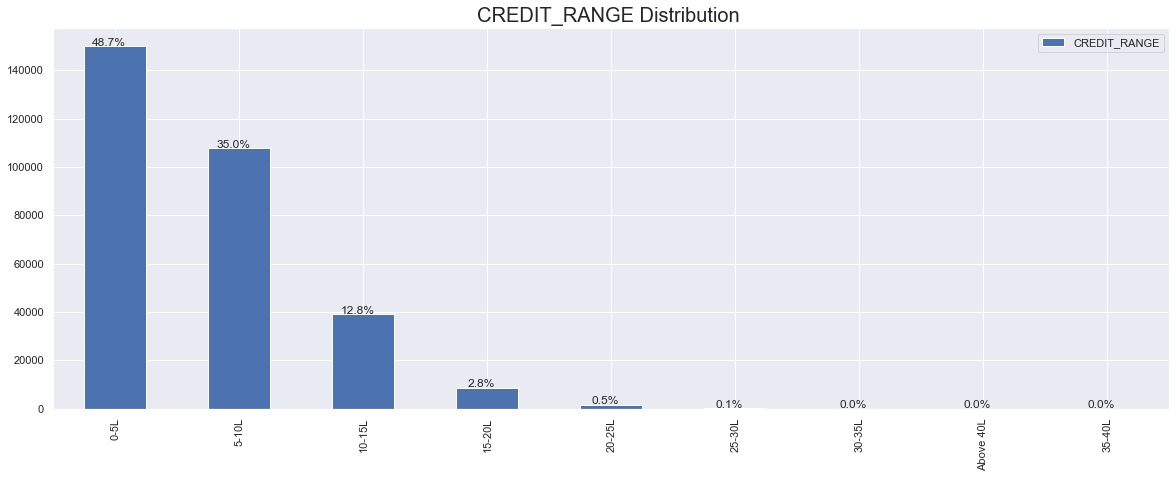

In [72]:
countplot(df1,'CREDIT_RANGE')

#### 💡 Observation:
- Major proportion of applicants have requested credit amount ranging from **0-5 lakhs (48.7%)** 

#### 5.1.11 Family Members

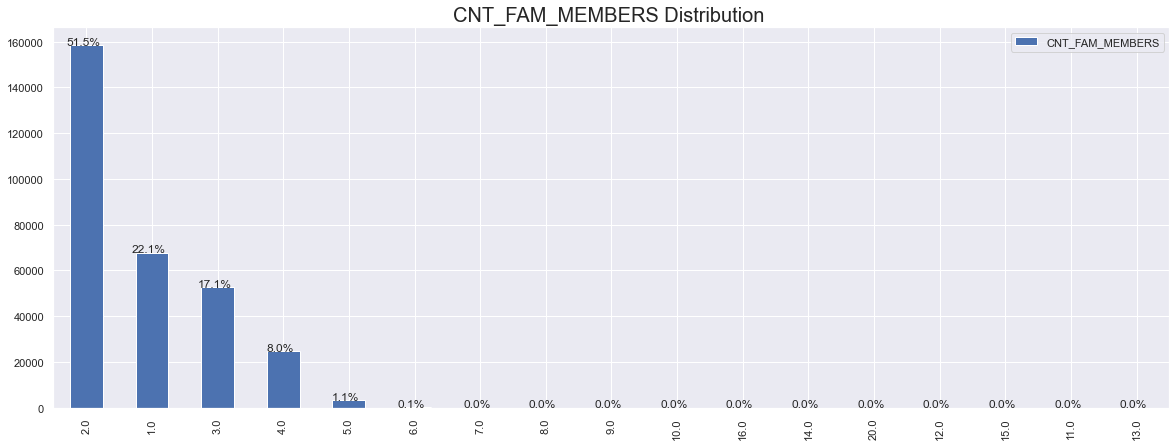

In [73]:
countplot(df1,'CNT_FAM_MEMBERS')

#### 💡 Observation:
- The count of family members in major proportion of the applicants is **2 (21.5%)** followed by **1 (22.1%)**

#### 5.1.12 REGION_POPULATION_RELATIVE

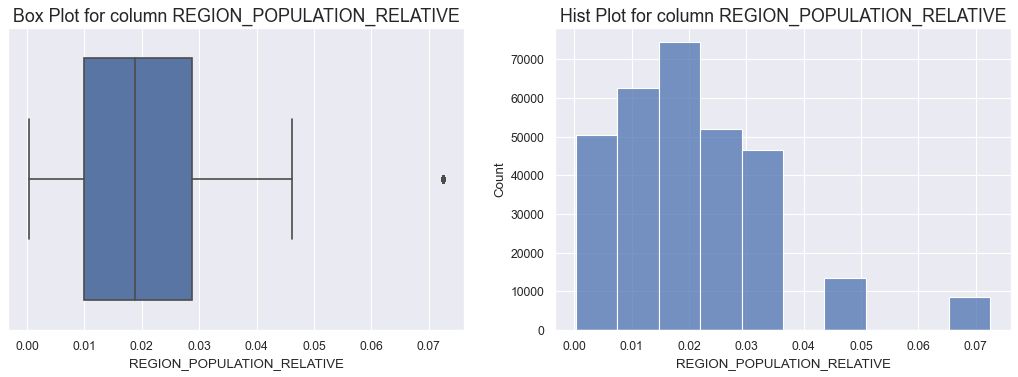

In [74]:
Numerical_box_hist(df1,'REGION_POPULATION_RELATIVE')

In [75]:
df1.REGION_POPULATION_RELATIVE.describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

#### 💡 Observation:
- Major proportion of applicants are residing in region with rating `0.01 to 0.03

#### 5.1.13 REGION_RATING_CLIENT

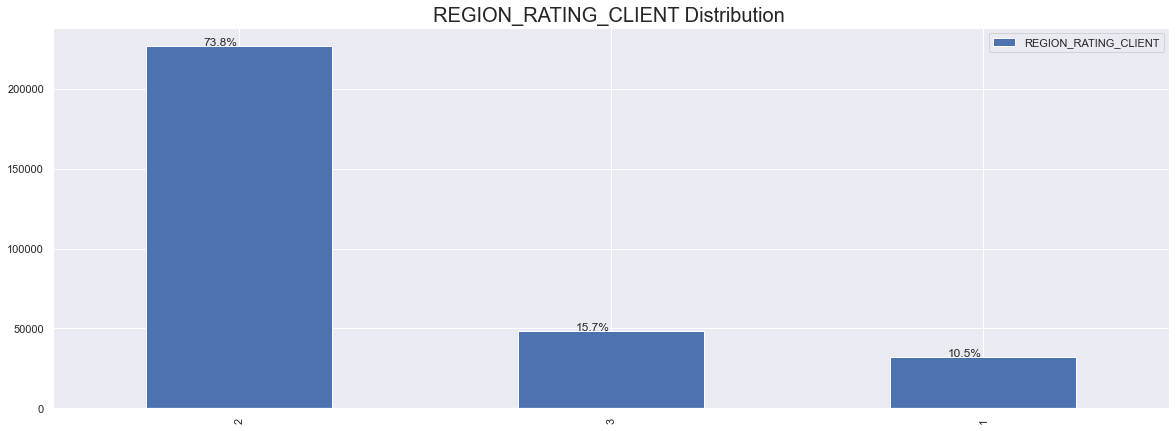

In [76]:
countplot(df1,'REGION_RATING_CLIENT')

In [77]:
df1.REGION_RATING_CLIENT.describe()

count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64

#### 💡 Observation:
- Major proportion of applicants are residing in region with rating *REGION_RATING_CLIENT* **2 (73.8%)**.

#### 5.1.14 REGION_RATING_CLIENT_W_CITY

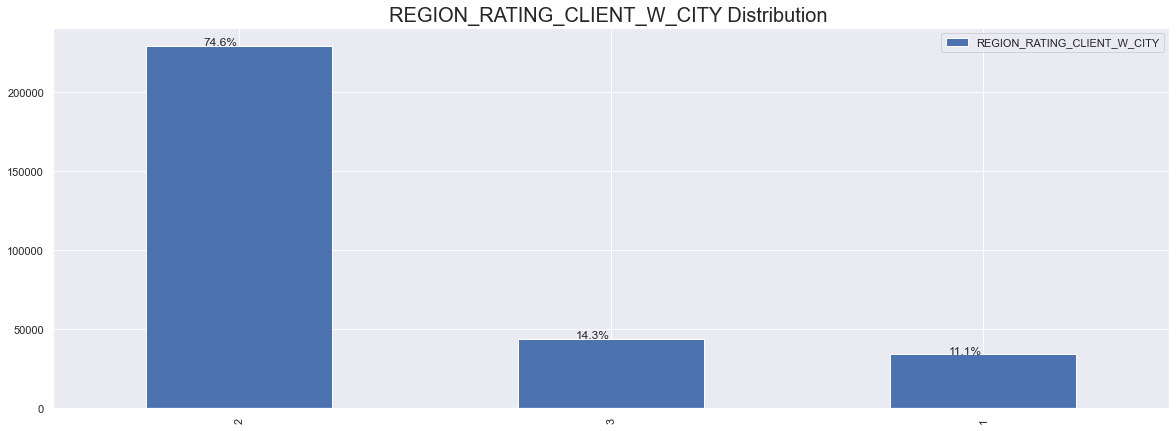

In [78]:
countplot(df1,'REGION_RATING_CLIENT_W_CITY')

In [79]:
df1.REGION_RATING_CLIENT_W_CITY.describe()

count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

#### 💡 Observation:
- Major proportion of applicants are residing in region with rating *REGION_RATING_CLIENT_W_CITY* **2 (74.6%)**

#### 5.1.15 Credit_Ratio

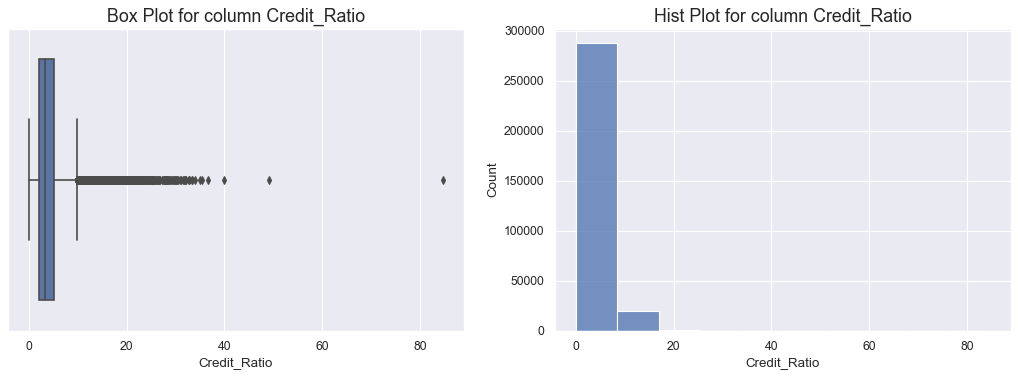

In [80]:
Numerical_box_hist(df1,'Credit_Ratio')

In [81]:
df1.Credit_Ratio.describe()

count    307511.000000
mean          3.957585
std           2.689684
min           0.000000
25%           2.020000
50%           3.270000
75%           5.160000
max          84.740000
Name: Credit_Ratio, dtype: float64

#### 💡 Observation:
- Major proportion of applicants have Credit ratio value in range **0 to ~ 5**

#### 5.1.16 AVERAGE_RATING

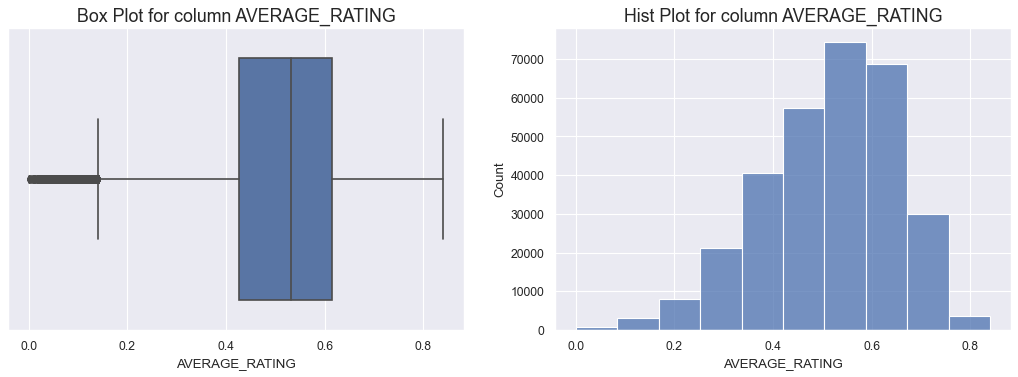

In [82]:
Numerical_box_hist(df1,'AVERAGE_RATING')

In [83]:
df1.AVERAGE_RATING.describe()

count    307511.000000
mean          0.515099
std           0.135318
min           0.000269
25%           0.425890
50%           0.532120
75%           0.615340
max           0.840552
Name: AVERAGE_RATING, dtype: float64

#### 💡 Observation:
- The Average Rating distribution seems to be unimodal and right skewed with major proportion of values ranging from **~0.4 to ~0.6**

#### 5.1.17 NAME_HOUSING_TYPE

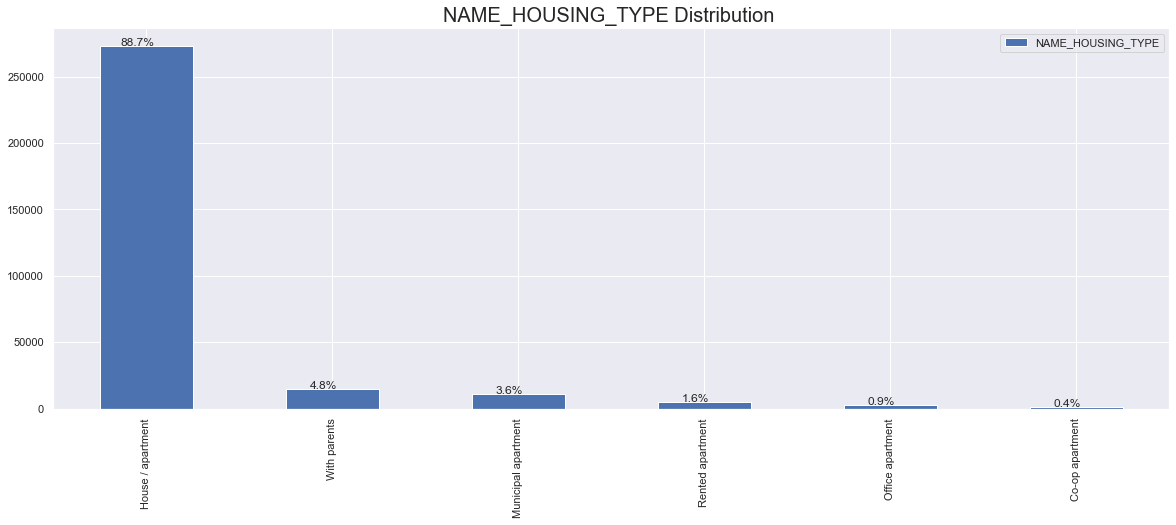

In [84]:
countplot(df1,'NAME_HOUSING_TYPE')

#### 💡 Observation:
- Significant proportion of applicants live in **House / Appartment** (88.7%).

#### 5.1.17 FLAG_OWN_REALTY

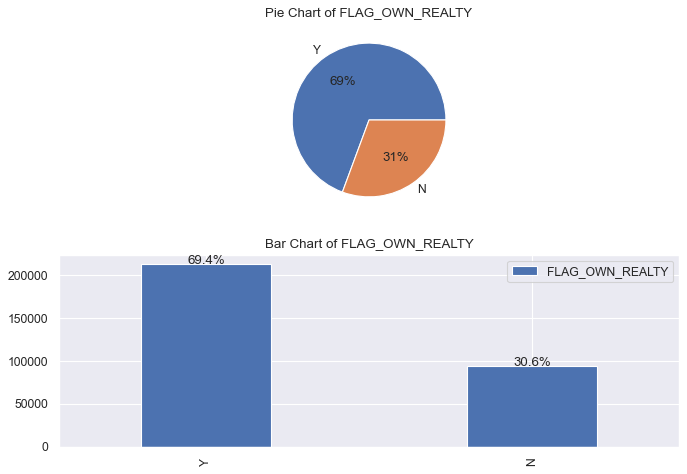

In [85]:
pie_count(df1,'FLAG_OWN_REALTY')

#### 💡 Observation:
- Major proportion of applicants own a house (66.4%)

### 5.2 Bi variate & Multivaraite Analysis

In [86]:
def bar_func(df,col1,col2):
    plt.figure(figsize=(20, 8))
    plots = sns.barplot(x=col1, y=col2, data=df)
  
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=15, xytext=(0, 8),textcoords='offset points')
        
    plt.xlabel(col1, size=14)
    plt.ylabel(col2, size=14)
    plt.xticks(rotation = 90)
    plt.title(f'{col1} vs {col2}')
    plt.show()

#### 5.2.1 Education type v/s Target

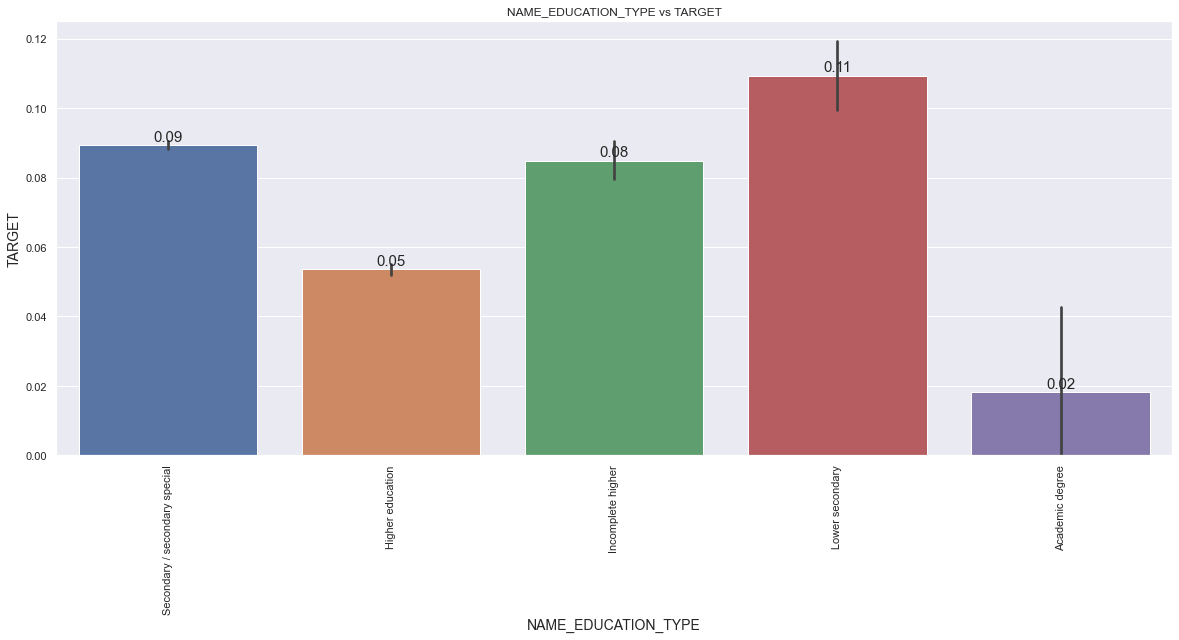

In [87]:
bar_func(df1,'NAME_EDUCATION_TYPE','TARGET')

#### 💡 Observation:
- Applicants with **Lower secondary** education seems to be most likely to have Payment difficulties followed by **secondary / secondary special**.

#### 5.2.2 Occupation type v/s Target

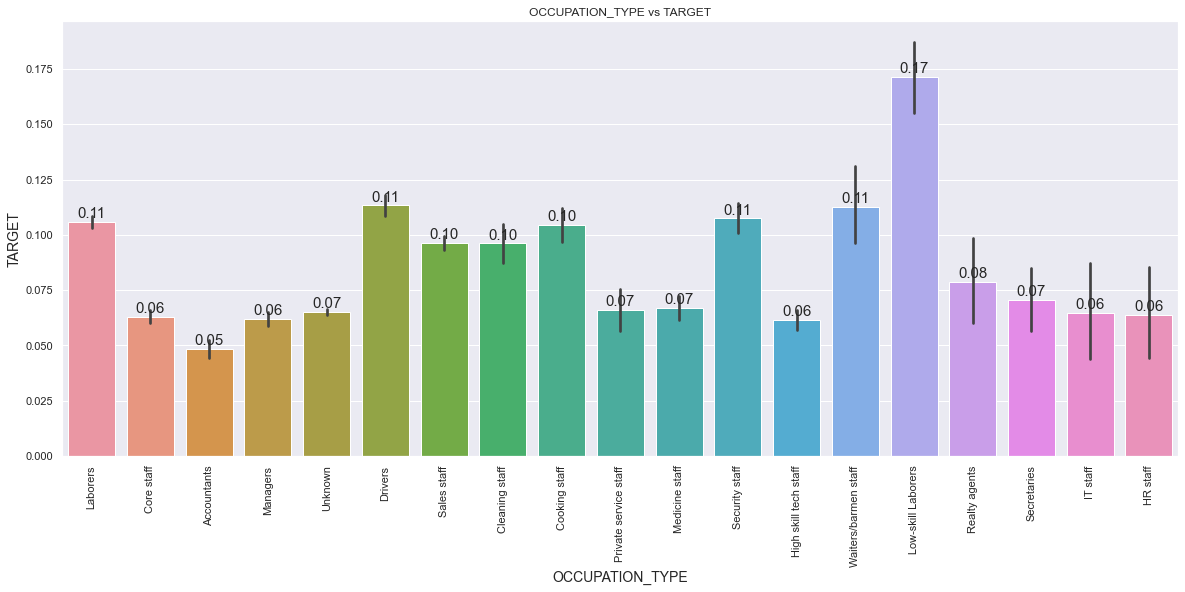

In [88]:
bar_func(df1,'OCCUPATION_TYPE','TARGET')

#### 💡 Observation:
- Applicants working as **Low skilled labourers** seems to be most likely to have Payment difficulties.

#### 5.2.3 Family status v/s Target

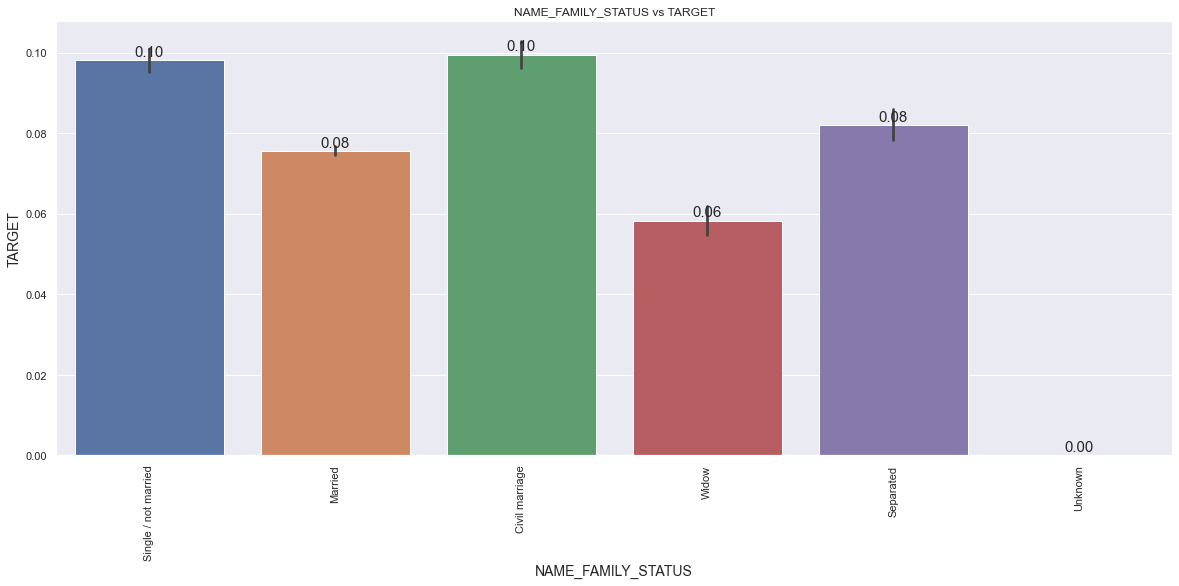

In [89]:
bar_func(df1,'NAME_FAMILY_STATUS','TARGET')

#### 💡 Observation:
- Applicants with family status **Single / unmarried** & **Civil marriage** seem to have more Payment difficulties as compared to other family status.

#### 5.2.4 Income Range v/s Target

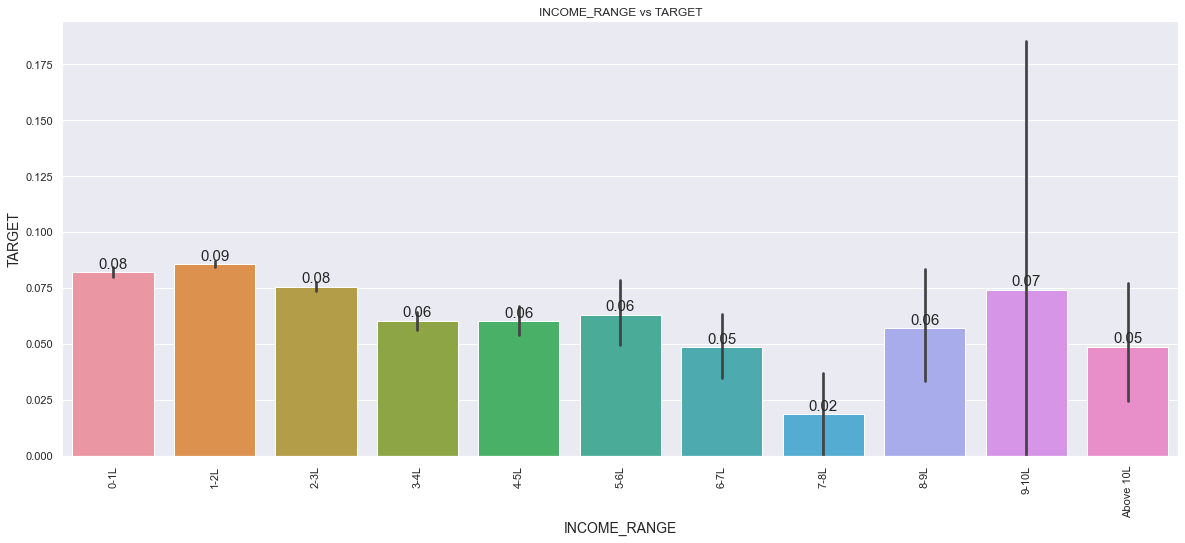

In [90]:
bar_func(df1,'INCOME_RANGE','TARGET')

#### 💡 Observation:
- Applicants with annual income ranging from **1-2 lakhs** seem to have slightly more payment difficulties when compared to others followed by those in income ranges **0-1 lakh** & **2-3 lakh**

#### 5.2.5 NAME_HOUSING_TYPE v/s Target

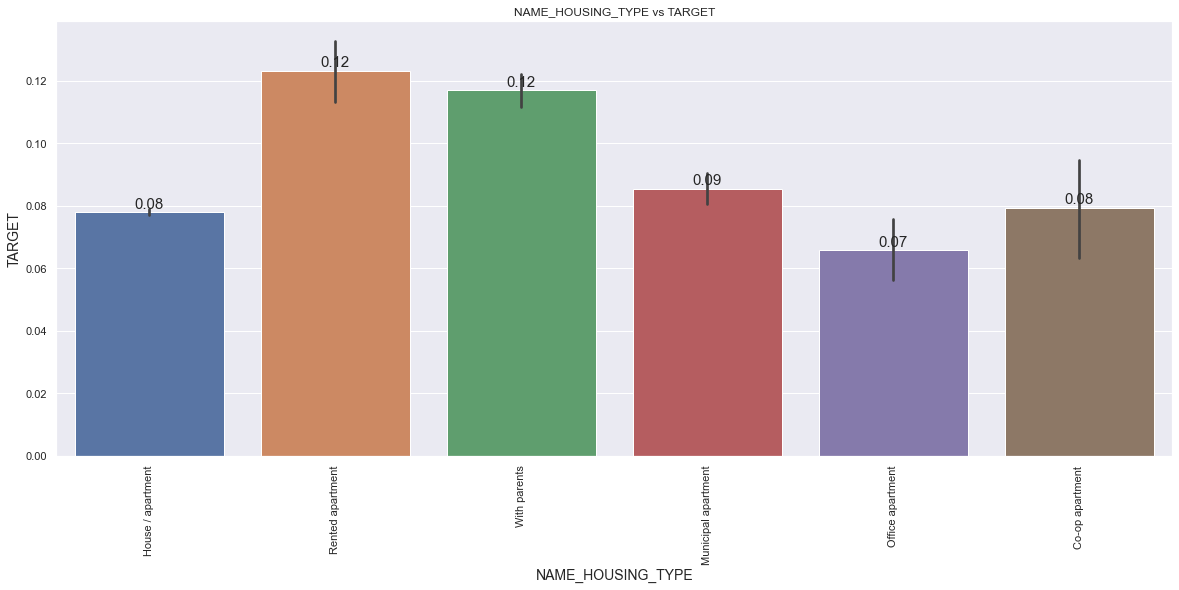

In [91]:
bar_func(df1,'NAME_HOUSING_TYPE','TARGET')

#### 💡 Observation:
- Applicants residing in **Rented apartments** & applicants residing **with parents** have more payment difficulties when compared to others

#### 5.2.5 Age v/s Target

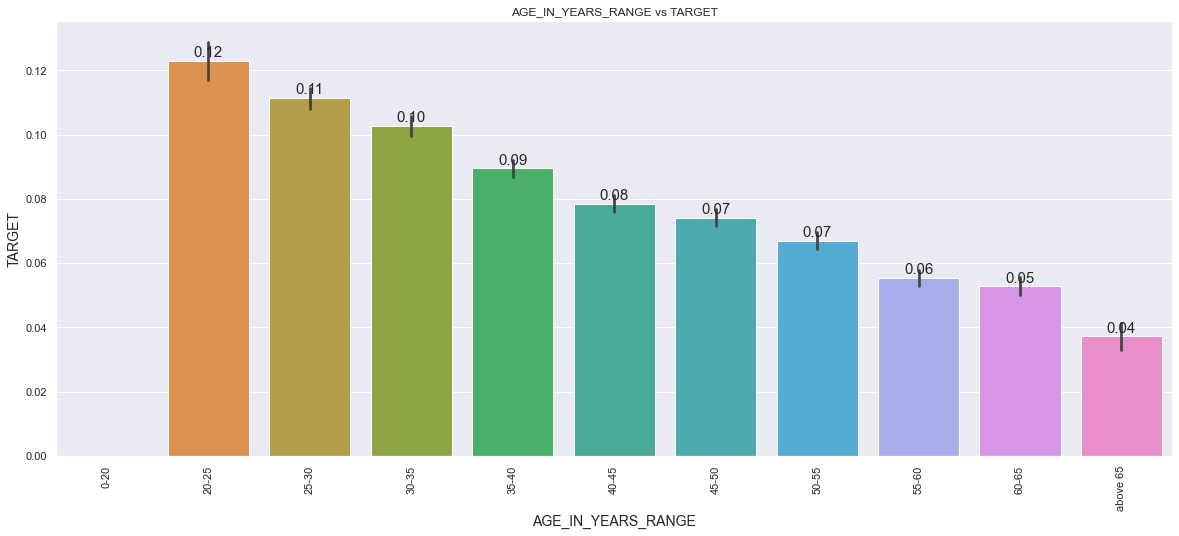

In [92]:
bar_func(df1,'AGE_IN_YEARS_RANGE','TARGET')

#### 💡 Observation:
- Applicants with age ranging from **20-25** seem to have more payment difficulties when compared to others followed by **25-30**

#### 5.2.6 Employment experience v/s Target

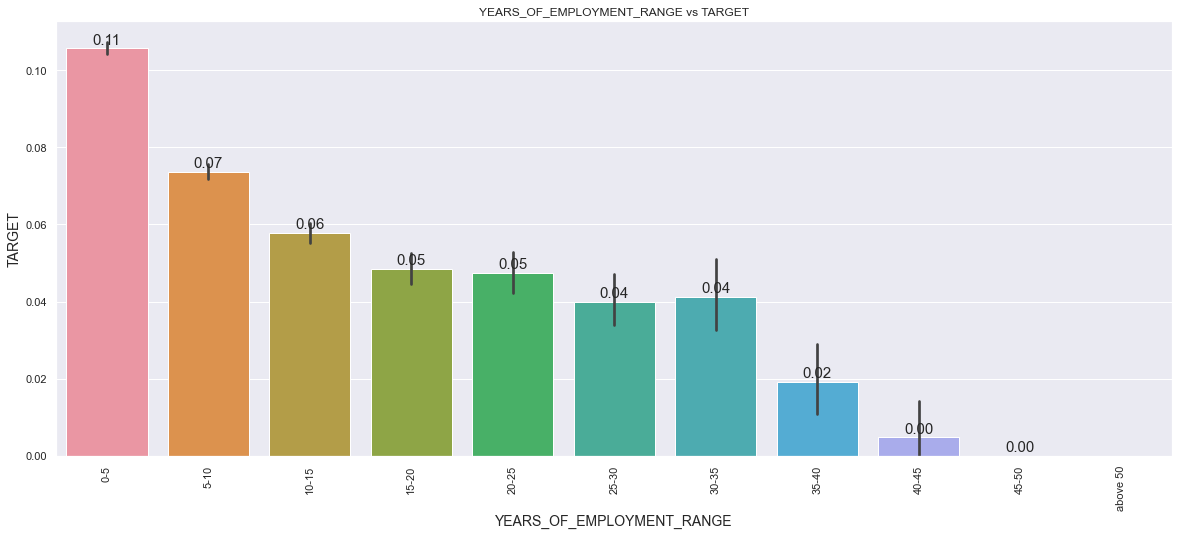

In [93]:
bar_func(df1,'YEARS_OF_EMPLOYMENT_RANGE','TARGET')

#### 💡 Observation:
- Applicants in the early phases of their career with employment experience ranging from **0-5** years have more payment difficulties when compared to others, followed by **5-10** years.

#### 5.2.7 Income v/s Target v/s Flag own car

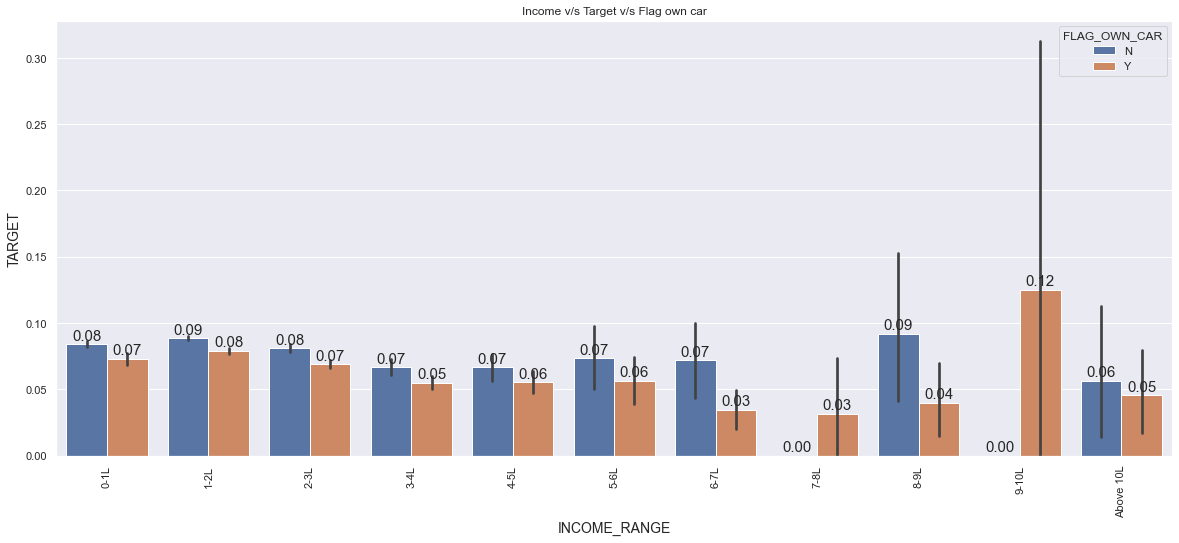

In [94]:
plt.figure(figsize=[20,8])
plots = sns.barplot(x=df1['INCOME_RANGE'], y=df1['TARGET'], hue=df1['FLAG_OWN_CAR'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
    (bar.get_x() + bar.get_width() / 2,
    bar.get_height()), ha='center', va='center',
    size=15, xytext=(0, 8),textcoords='offset points')

plt.xlabel('INCOME_RANGE', size=14)
plt.ylabel('TARGET', size=14)
plt.xticks(rotation = 90)
plt.title('Income v/s Target v/s Flag own car')
plt.show()

#### 💡 Observation:

In all income ranges, except, 7-8L and 9-10L, customers who own a car are less likely to default than those who don't own a car.

#### 5.2.8 Credit v/s Target v/s Income

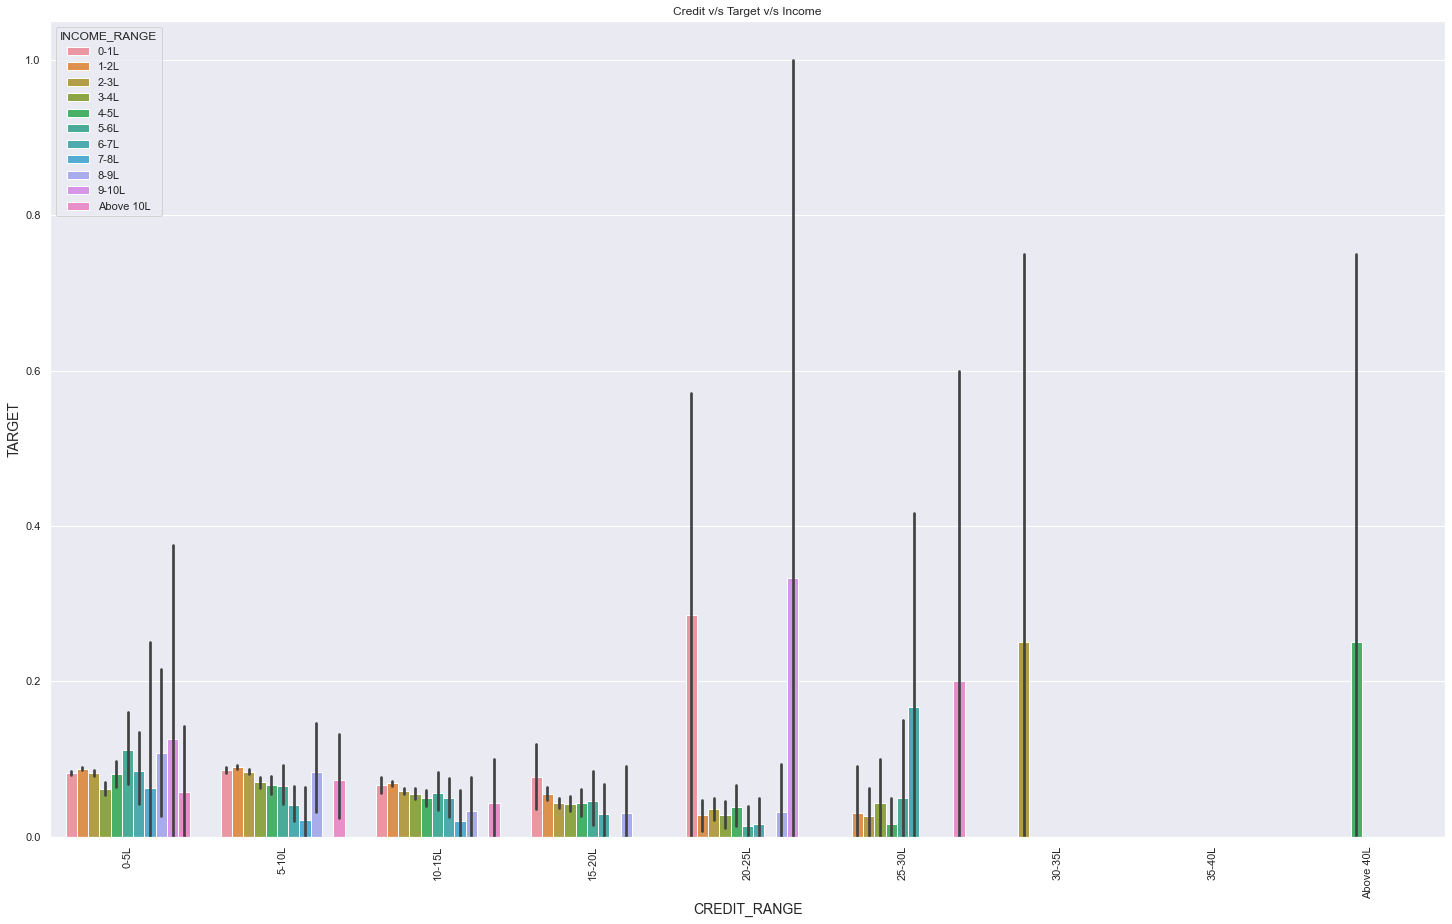

In [95]:
plt.figure(figsize=[25,15])
plots = sns.barplot(x=df1['CREDIT_RANGE'], y=df1['TARGET'], hue=df1['INCOME_RANGE'])

plt.xlabel('CREDIT_RANGE', size=14)
plt.ylabel('TARGET', size=14)
plt.xticks(rotation = 90)
plt.title('Credit v/s Target v/s Income')
plt.show()

#### 💡 Observation:

- Customers in the income ranges between 0-3L and credit range 0-5L are less likely to have payment difficulties as compared to those in income ranges between 5-6L, 8-9L and 9-10L and in the same credit range. 

- Customers in the income ranges 0-1L and 9-10L and credit range 20-25L are much more likely to default than those in the same credit range and different income ranges.

### 5.3 Segmented Analysis

#### 5.3.1 Segmenting databaes based on Target variable

Dividing the given Dataset 'Application_Data.csv' into 2 based on the value of Target variable.

1. Target == 1 ==> Client with Payment Difficulties; Dataframe Name : df1_payment_diff 
2. Target == 0 ==> All other Cases; Dataframe Name : df1_allother 

In [96]:
df1_payment_diff = df1[df1['TARGET']==1]
df1_allother = df1[df1['TARGET']==0]

In [97]:
# Client with Payment Difficulties
df1_payment_diff.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE (IN YEARS) AGE_IN_YEARS_RANGE  YEARS_OF_EMPLOYMENT YEARS_OF_EMPLOYMENT_RANGE  INCOME (IN LAKHS) INCOME_RANGE  CREDIT(IN LAKHS) CREDIT_RANGE  AVERAGE_RATING  Credit_Ratio
0       100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       0.9722         0.0833                        0.9722          0.0833                        0.9722          0.0833          0.0149                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0           25.92              25-30                 1.75                       0-5               2.02         2-3L              4.07         0-5L        0.201162          2.01
26      100031       1         Cash loans           F            N               Y             0          112500.0    979992.0      27076.5         702000.0   Unaccompanied               Working  Secondary / secondary special                 Widow  House / apartment                    0.018029      -18724          -2628            -6573.0            -1827           1               1                0                 1           0           0   Cooking staff              1.0 

In [98]:
# client with All other Cases
df1_allother.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE (IN YEARS) AGE_IN_YEARS_RANGE  YEARS_OF_EMPLOYMENT YEARS_OF_EMPLOYMENT_RANGE  INCOME (IN LAKHS) INCOME_RANGE  CREDIT(IN LAKHS) CREDIT_RANGE  AVERAGE_RATING  Credit_Ratio
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0           Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246      0.535276                       0.9851         0.2917                        0.9851          0.2917                        0.9851          0.2917          0.0714                       1.0                       0.0                       1.0                       0.0                  -828.0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0           45.93              45-50                 3.25                       0-5               2.70         2-3L             12.94       10-15L        0.578761          4.79
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0    Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0               

In [99]:
df1_payment_diff.shape

(24825, 90)

In [100]:
df1_allother.shape

(282686, 90)

#### 5.3.2 Segmented Univariate

In [101]:
# creating a function for Segmented Categorical values
def segment_count(variable):
    plt.style.use('seaborn-darkgrid')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(25,8))
    
    sns.countplot(x=variable, data=df1_payment_diff,linewidth=1,ax=ax1,edgecolor=sns.color_palette("dark", 3))
    ax1.set_ylabel('Total Counts')
    ax1.set_title('Count plot for Payment Difficulties',fontsize=18)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Annotation for 1st sub plot
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(df1_payment_diff))*100), (p.get_x()+0.4, p.get_height()+100), ha='center')
        
    sns.countplot(x=variable, data=df1_allother,ax=ax2,linewidth=1,edgecolor=sns.color_palette("dark", 3))
    ax2.set_ylabel('Total Counts')
    ax2.set_title('Count plot for All others',fontsize = 18,)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Annotation for 2nd sub plot
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(df1_allother))*100), (p.get_x()+0.4, p.get_height()+100), ha='center')
    

In [102]:
# creating a function for Segmented Numerical values
def segmented_dist(variable):
    
    sns.set(style='darkgrid')
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.distplot(df1_payment_diff[variable].dropna())
    plt.title('Distplot for Payment Difficulties',fontsize=15)
    plt.xlabel(variable)
    
    plt.subplot(1, 2, 2)
    sns.distplot(df1_allother[variable].dropna())
    plt.title('Displot for All others',fontsize=15)
    plt.xlabel(variable)
    
    plt.show()
    

#### 5.3.3 Gender

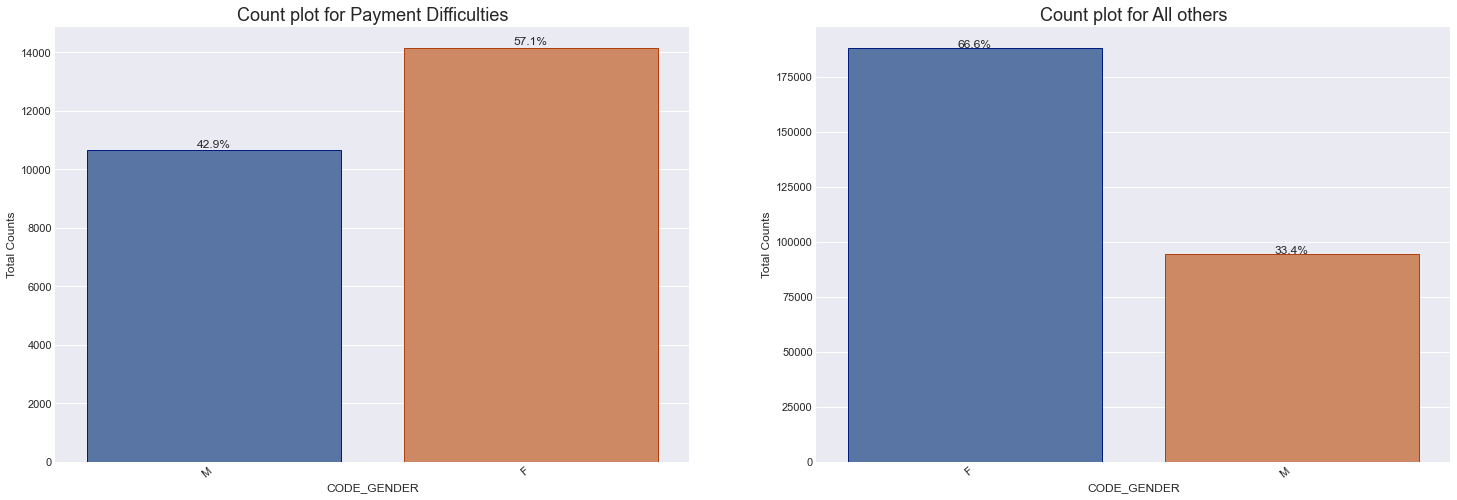

In [103]:
segment_count('CODE_GENDER')

#### 💡 Observation:
- The proportion of female applicants is higher than the male applicants in both the segments.

#### 5.3.4 Type of Contract

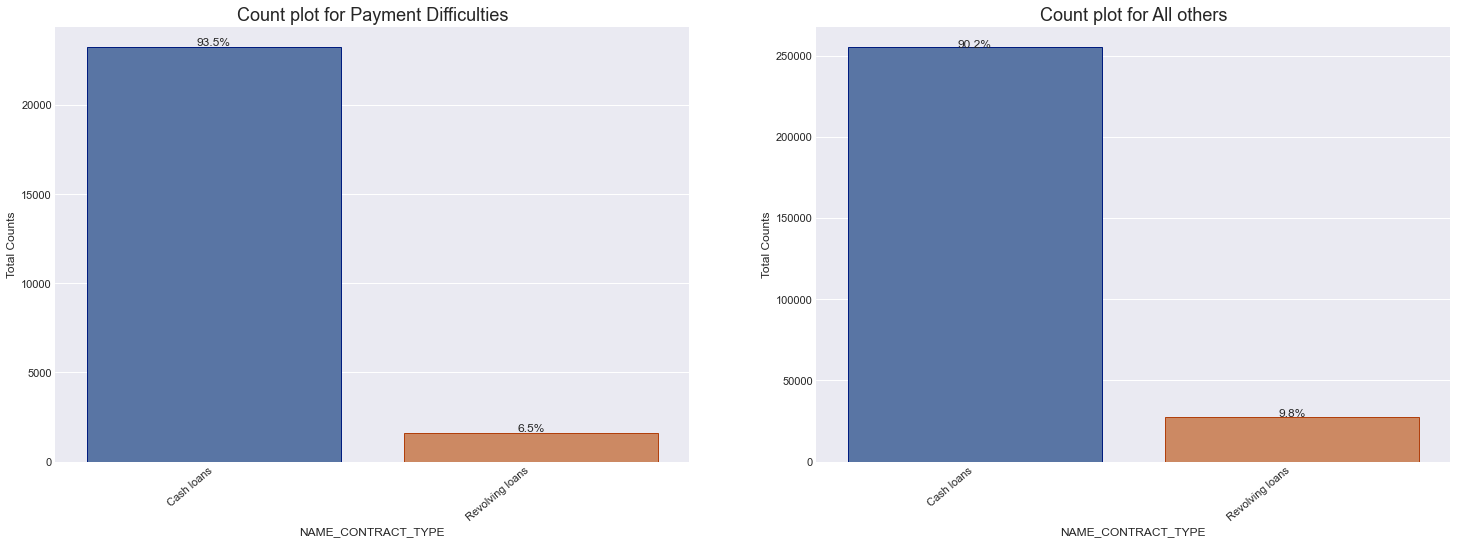

In [104]:
segment_count('NAME_CONTRACT_TYPE')

#### 💡 Observation:
- Cash loans are the most common type of loans applied in both segments.

#### 5.3.5 NAME_EDUCATION_TYPE

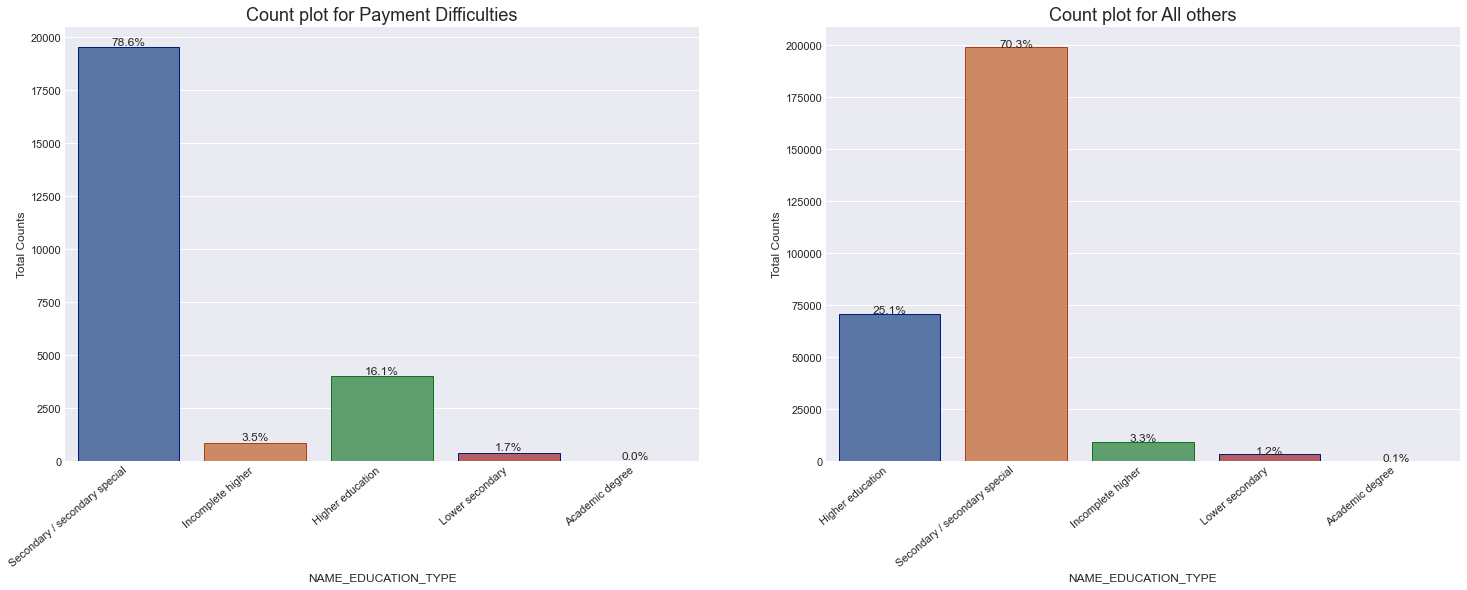

In [105]:
segment_count('NAME_EDUCATION_TYPE')

#### 💡 Observation:
- For applicants in both the datasets, the most common level of education is **Secondary / Secondary Special** and the least is **Academic Degree**.

#### 5.3.6 Income Type

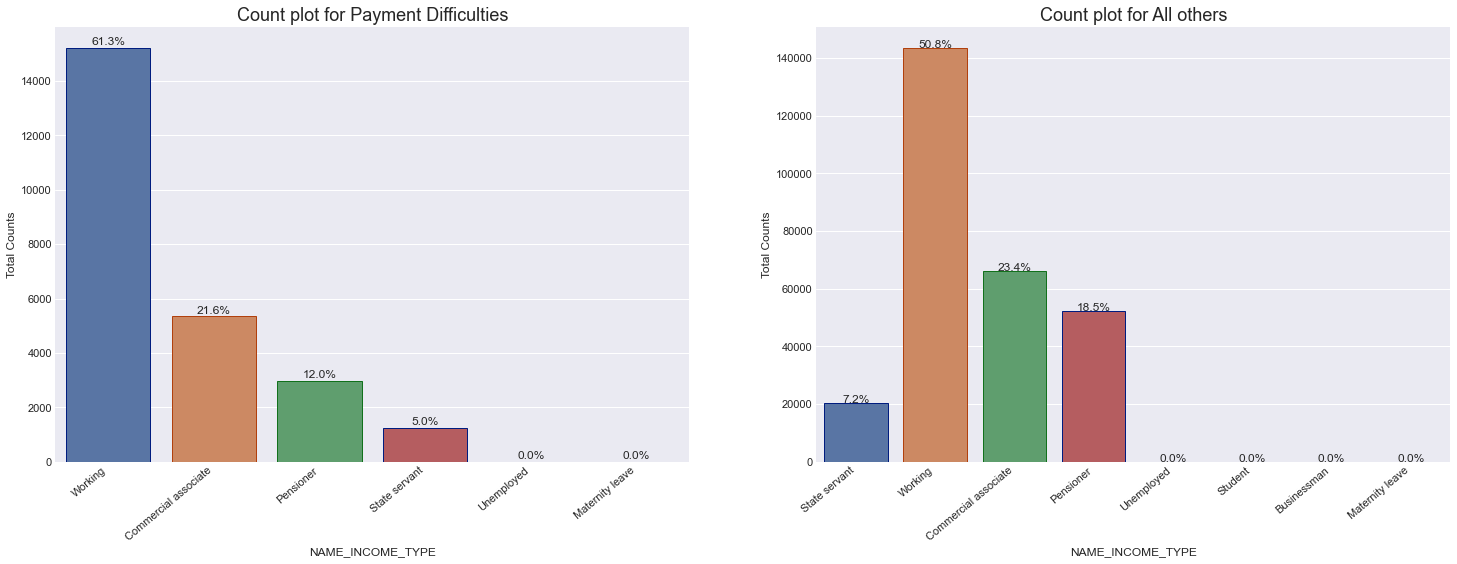

In [106]:
segment_count('NAME_INCOME_TYPE')

#### 💡 Observation:
- For applicants with Payment Difficulties and All other cases, the most common Income Type is **Working**.
- For applicants with Payment Difficulties and All other cases, the **Unemployed** percentage is **0.0%**.

#### 5.3.7 YEARS_OF_EMPLOYMENT_RANGE

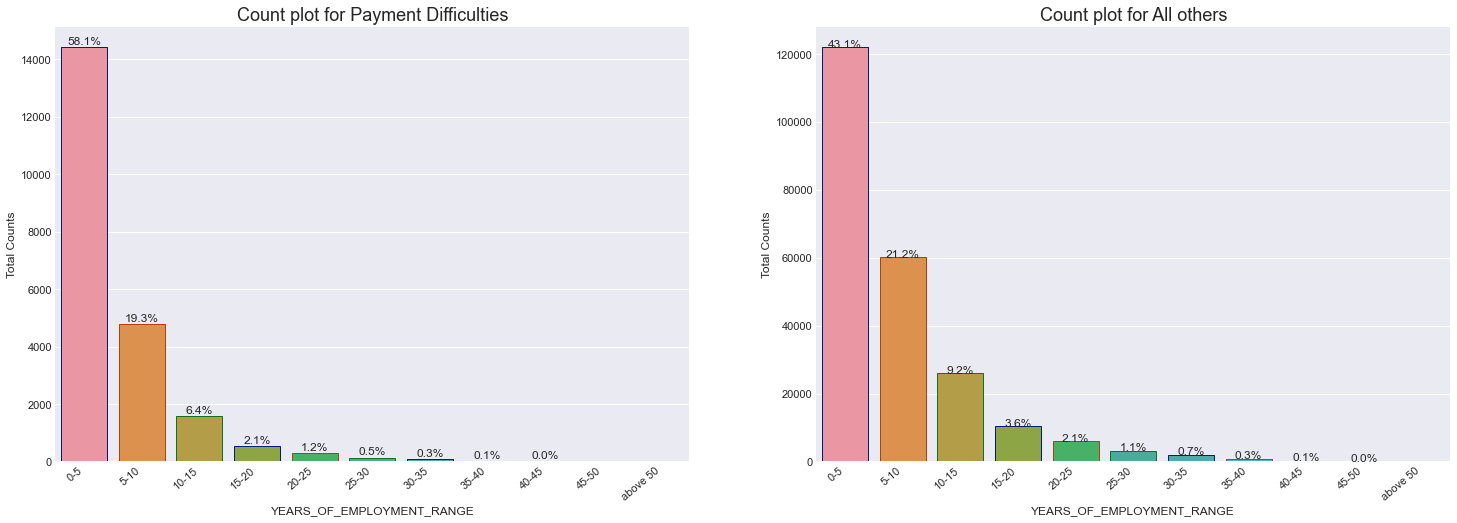

In [107]:
segment_count('YEARS_OF_EMPLOYMENT_RANGE')

#### 💡 Observation:
- For both the datasets - Payment Difficulties and All other cases, most of the applicants have employment experience between **0-5 years**.

#### 5.3.8 NAME_TYPE_SUITE

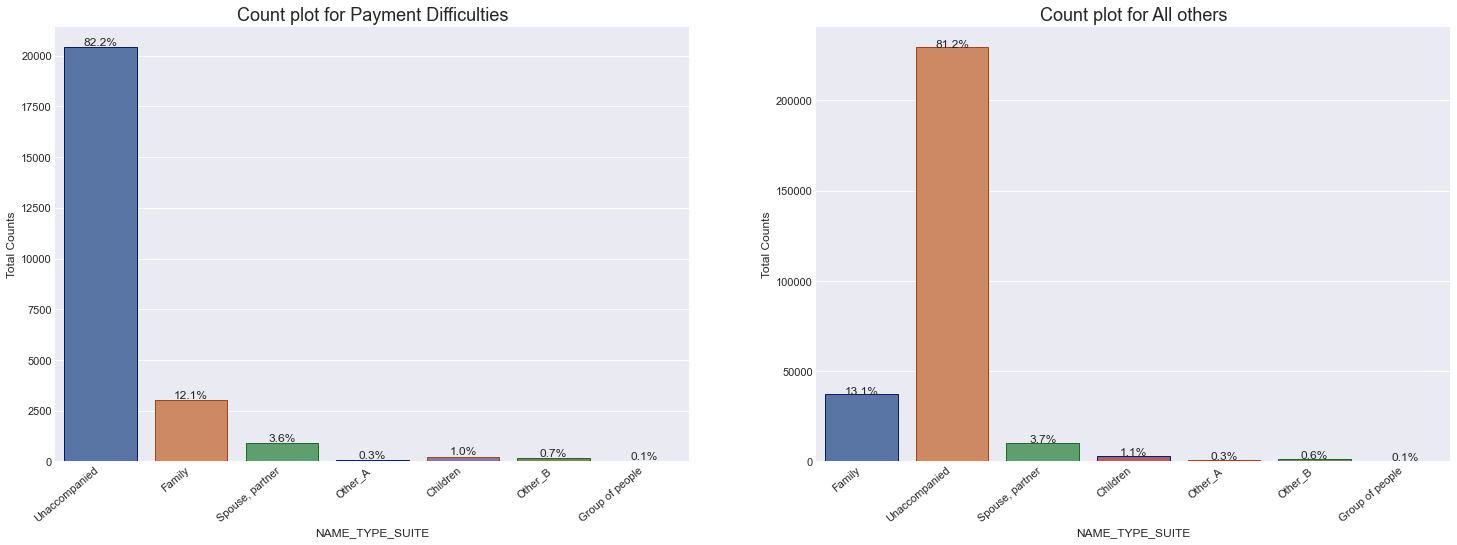

In [108]:
segment_count('NAME_TYPE_SUITE')

#### 💡 Observation:
- Majority of both the types of applicants were **Unaccompanied** during the loan application process.

#### 5.3.9 NAME_FAMILY_STATUS

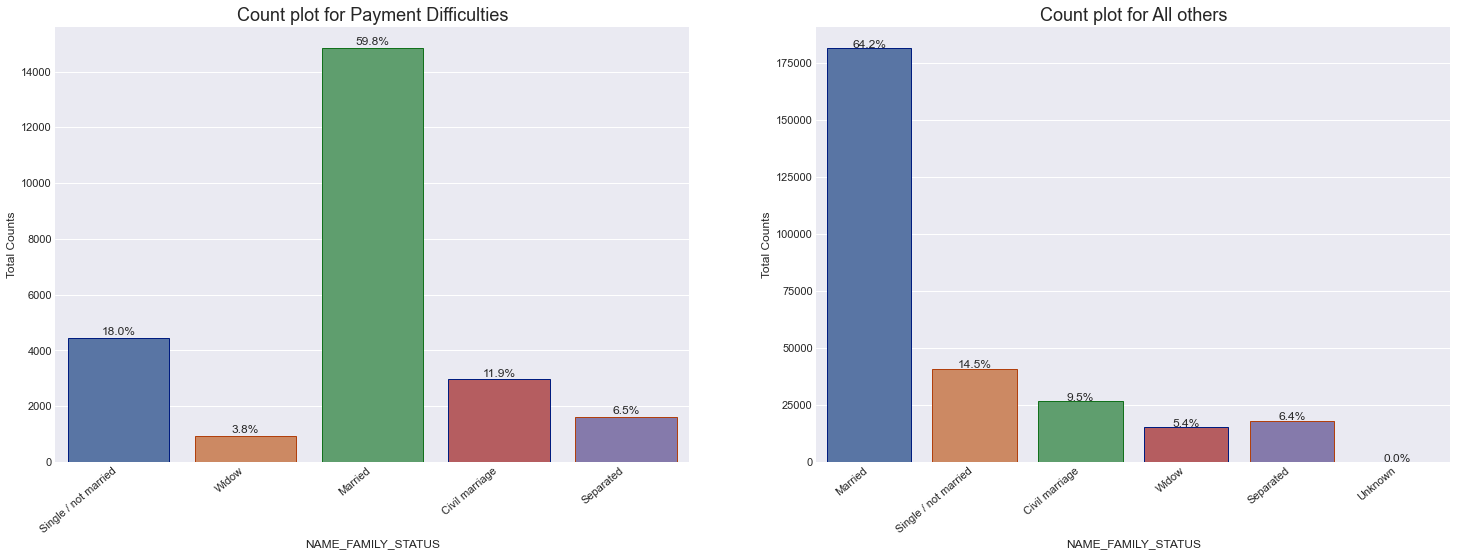

In [109]:
segment_count('NAME_FAMILY_STATUS')

#### 💡 Observation:
- Majority of both the types of applicants are **Married**. They are followed by **Single / Not Married**.

#### 5.4 Segmented Bivariate & Multivariate

In [110]:
def Multivariate_Plot(data,var1,var2,var3,title):

    plt.style.use('seaborn-darkgrid')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(27,9))
    
    sns.boxenplot(x=var1,y = var2, data=data,hue='NAME_FAMILY_STATUS')
    ax.set_ylabel(f'{var2}')
    ax.set_xlabel(f'{var1}')

    ax.set_title(title,fontsize=25)
    ax.set_xticklabels(ax.get_xticklabels(), ha="right")
     
    plt.show()

**Education Type v/s Amount Credited**

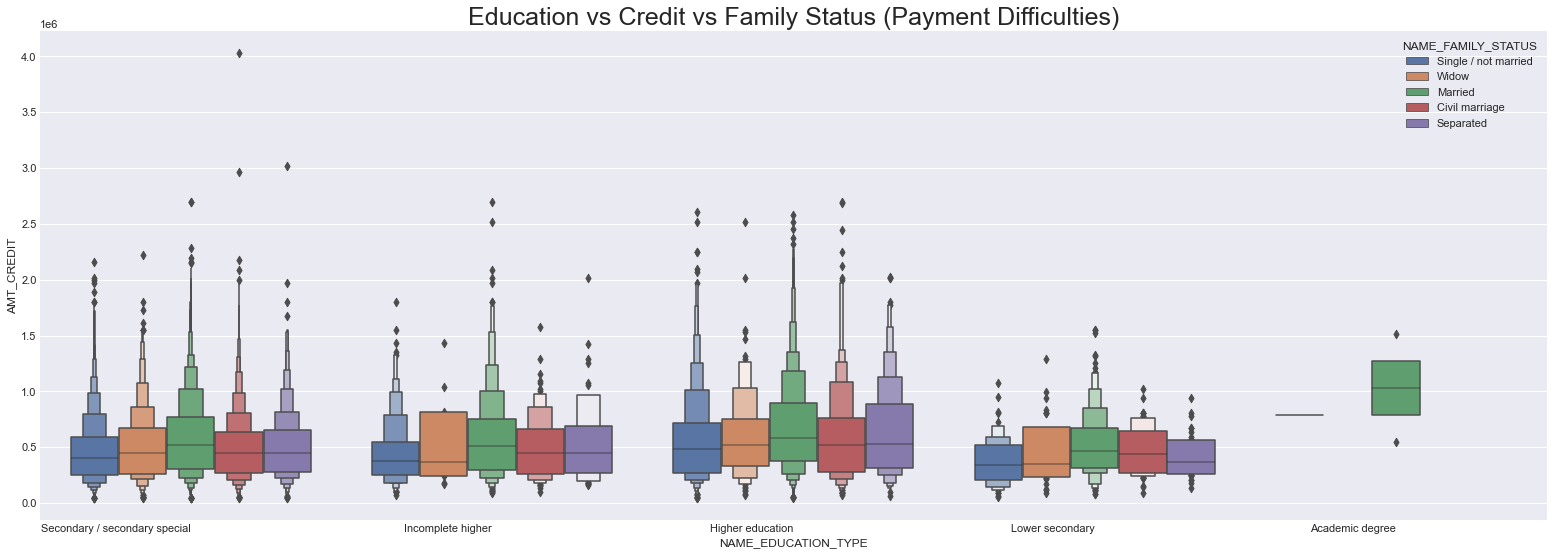

In [111]:
Multivariate_Plot(df1_payment_diff,'NAME_EDUCATION_TYPE',"AMT_CREDIT","NAME_FAMILY_STATUS","Education vs Credit vs Family Status (Payment Difficulties)")

#### 💡 Observation: 

- For Applicants with payment difficulties, those with family status - married, have the highest median values across all the education types. So, the median credit amount is highest as compared with others. 

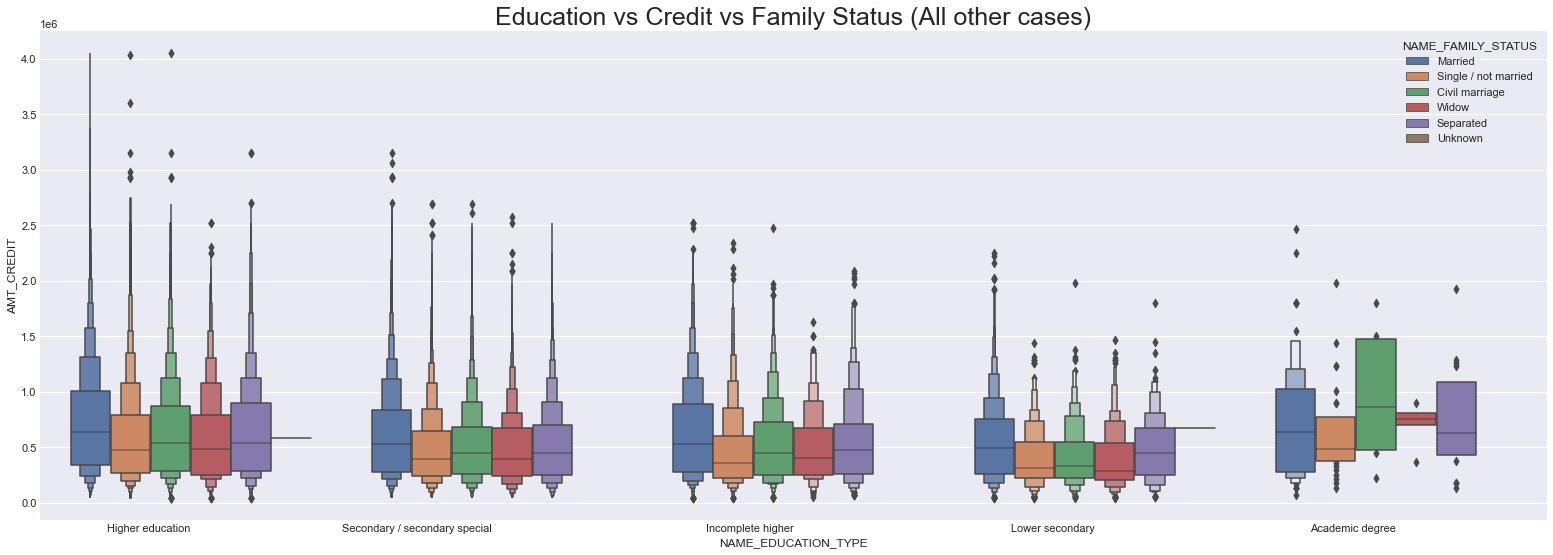

In [112]:
Multivariate_Plot(df1_allother,'NAME_EDUCATION_TYPE',"AMT_CREDIT","NAME_FAMILY_STATUS", "Education vs Credit vs Family Status (All other cases)")

#### 💡 Observation:

- For applicants in all the other cases, those with Family status Married have higher Median values across all education types except Academic Degree. 
- Those applicants who have an academic degree and who have had a civil marriage have the highest median value i.e. hence they've requested the highest median amount of credit.

**Annuity Credit v/s Amount Goods Price**

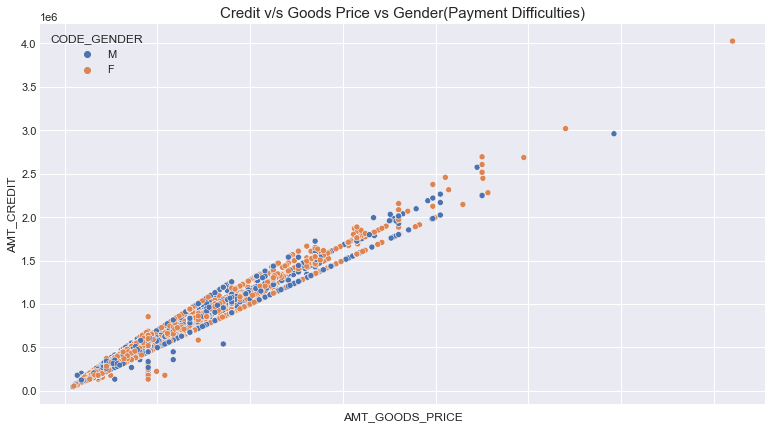

In [113]:
plt.figure(figsize=[13,7])
ax=sns.scatterplot(data=df1_payment_diff.dropna(), x="AMT_GOODS_PRICE", y="AMT_CREDIT", hue='CODE_GENDER')
ax.set_ylabel('AMT_CREDIT')
ax.set_xlabel('AMT_GOODS_PRICE')

ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title('Credit v/s Goods Price vs Gender(Payment Difficulties)', fontsize=15)

plt.show()

#### 💡 Observation:
- There seems to be a positive correlation between the credit amount and the goods price amount.
- The number of female applicants are much higer than the count of male applicants.

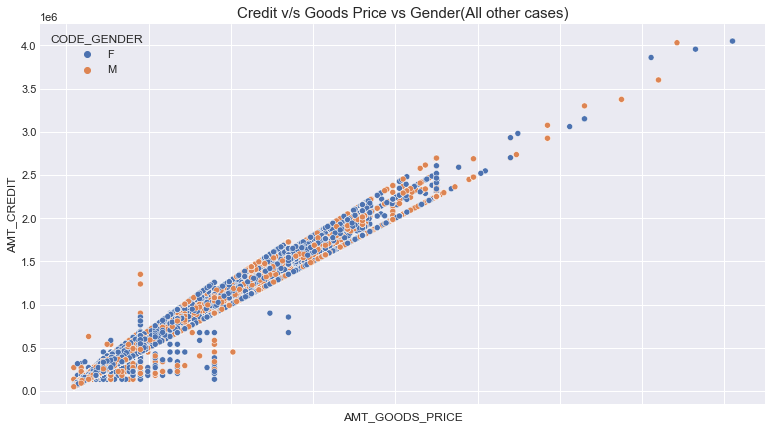

In [114]:
plt.figure(figsize=[13,7])
ax=sns.scatterplot(data=df1_allother.dropna(), x="AMT_GOODS_PRICE", y="AMT_CREDIT", hue='CODE_GENDER')
ax.set_ylabel('AMT_CREDIT')
ax.set_xlabel('AMT_GOODS_PRICE')

ax.set_xticklabels(ax.get_xticklabels(), ha="right")
plt.title('Credit v/s Goods Price vs Gender(All other cases)', fontsize=15)

plt.show()

#### 💡 Observation:

- There seems to be a positive correlation between the credit amount and the goods price amount.
- There are more outliers in this graph. There is a probability that a higher number of applicants who belong to 'All Other Cases' will go for goods that have a higher price and hence ask for a higher credit amount as compared with those that have payment difficulties.

**Ext source 2 v/s Annual Income**

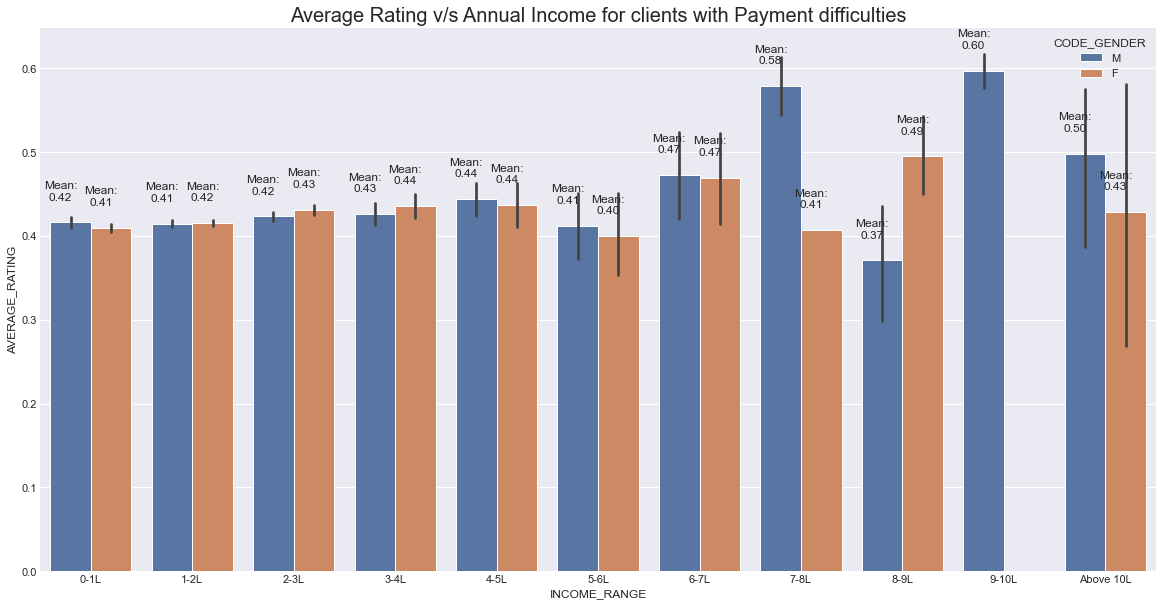

In [115]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x=df1_payment_diff['INCOME_RANGE'],y=df1_payment_diff['AVERAGE_RATING'],hue=df1_payment_diff['CODE_GENDER'])
for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x+0.1, h +0.05)
    text = f'Mean:\n{h:0.2f}'
    ax.annotate(text=text, xy=xy, ha='center', va='top')
plt.title("Average Rating v/s Annual Income for clients with Payment difficulties",fontsize=20)
plt.show()

#### 💡 Observation:

- For applicants with payment difficulties, the average rating for both the genders is very close for the Income brackets upto 7 Lakhs.
- The number of female applicants in the income bracket **9-10L** is the least among all the income ranges; count = 11.

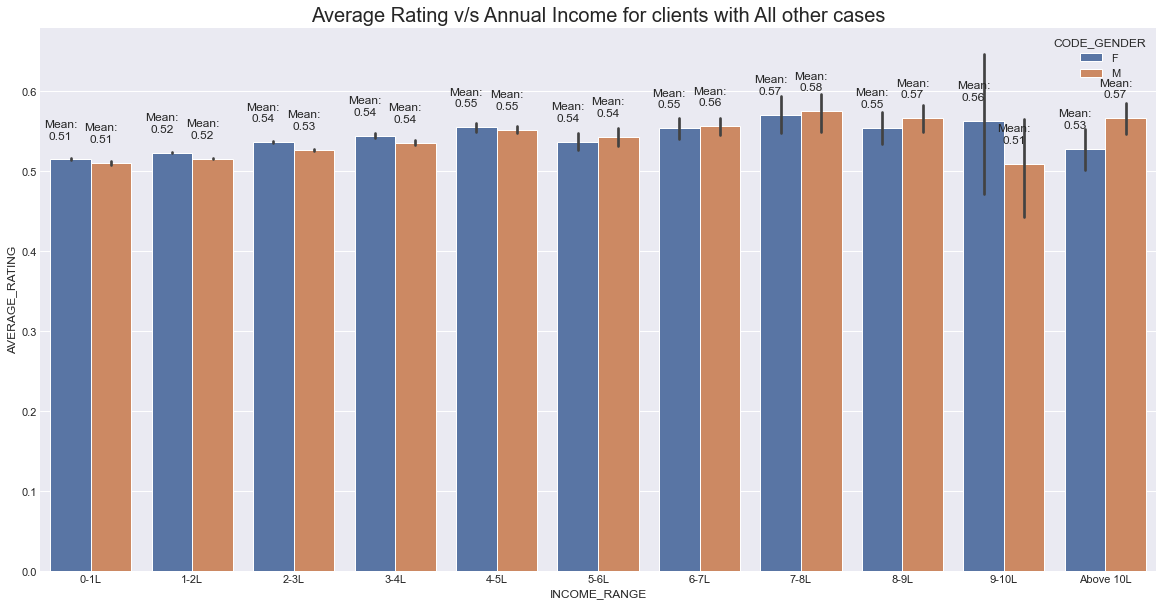

In [116]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x=df1_allother['INCOME_RANGE'],y=df1_allother['AVERAGE_RATING'],hue=df1_allother['CODE_GENDER'])
for p in ax.patches:
    h, w, x = p.get_height(), p.get_width(), p.get_x()
    xy = (x+0.1, h +0.05)
    text = f'Mean:\n{h:0.2f}'
    ax.annotate(text=text, xy=xy, ha='center', va='top')
plt.title("Average Rating v/s Annual Income for clients with All other cases",fontsize=20)
plt.show()

#### 💡 Observation:
- The average rating for applicants is higher in 'Clients with All Other cases' than the clients with Payment difficulties irrespective of gender and the income brackets.

### 5.5 Top 10 Correlations

**Top 10 correlations for customers with payment difficulties**

In [117]:
x = list(set(df1_payment_diff) - set(('AGE (IN YEARS)','INCOME (IN LAKHS)','AVERAGE_RATING','AGE_IN_YEARS_RANGE', 'YEARS_OF_EMPLOYMENT', 'YEARS_OF_EMPLOYMENT_RANGE', 'INCOME_RANGE', 'Credit_Ratio', 'CREDIT(IN LAKHS)', 'CREDIT_RANGE')))
df1_paydiff = df1_payment_diff[x]
df1_paydiff.head()

FLOORSMAX_MEDI       ORGANIZATION_TYPE  YEARS_BEGINEXPLUATATION_MODE  FLAG_DOCUMENT_12  OBS_60_CNT_SOCIAL_CIRCLE  NAME_HOUSING_TYPE  LIVE_CITY_NOT_WORK_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  FLAG_EMP_PHONE  CNT_FAM_MEMBERS  YEARS_BEGINEXPLUATATION_MEDI  DAYS_ID_PUBLISH  AMT_REQ_CREDIT_BUREAU_MON  AMT_INCOME_TOTAL  FLAG_DOCUMENT_9  FLAG_DOCUMENT_13  YEARS_BEGINEXPLUATATION_AVG  FLAG_MOBIL  TARGET  FLAG_DOCUMENT_21 FLAG_OWN_REALTY  AMT_REQ_CREDIT_BUREAU_QRT FLAG_OWN_CAR  REGION_POPULATION_RELATIVE  FLAG_DOCUMENT_6  FLAG_DOCUMENT_5    NAME_FAMILY_STATUS  FLAG_DOCUMENT_8  FLOORSMAX_AVG NAME_TYPE_SUITE  AMT_GOODS_PRICE  AMT_REQ_CREDIT_BUREAU_HOUR  TOTALAREA_MODE  LIVE_REGION_NOT_WORK_REGION  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  DAYS_EMPLOYED  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_DAY  DEF_30_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_16 CODE_GENDER WEEKDAY_APPR_PROCESS_START  FLAG_DOCUMENT_10  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_REGISTRATION  FLAG_DOCUMENT_17  AMT_ANNUITY  REGION_RATING_CLIENT  FLAG_CONT_MOBILE NAME_CONTRACT_TYPE  REG_CITY_NOT_WORK_CITY  FLAG_DOCUMENT_19  FLOORSMAX_MODE  DAYS_BIRTH  FLAG_WORK_PHONE  FLAG_PHONE  REGION_RATING_CLIENT_W_CITY  FLAG_DOCUMENT_20  AMT_CREDIT  SK_ID_CURR  FLAG_DOCUMENT_18  FLAG_DOCUMENT_2  OBS_30_CNT_SOCIAL_CIRCLE  REG_REGION_NOT_WORK_REGION  FLAG_DOCUMENT_14  CNT_CHILDREN  DAYS_LAST_PHONE_CHANGE  FLAG_EMAIL  FLAG_DOCUMENT_7            NAME_EDUCATION_TYPE  AMT_REQ_CREDIT_BUREAU_YEAR OCCUPATION_TYPE  FLAG_DOCUMENT_11  FLAG_DOCUMENT_15  EXT_SOURCE_3  REG_CITY_NOT_LIVE_CITY  EXT_SOURCE_2      NAME_INCOME_TYPE
0           0.0833  Business Entity Type 3                        0.9722                 0                       2.0  House / apartment                        0                       10                           0               1              1.0                        0.9722            -2120                        0.0          202500.0                0                 0                       0.9722           1       1                 0               Y                        0.0            N                    0.018801                0                0  Single / not married                0         0.0833   Unaccompanied         351000.0                         0.0          0.0149                            0                1                0           -637                         0.0                        0.0                       2.0                 0           M                  WEDNESDAY                 0                       2.0            -3648.0                 0      24700.5                     2                 1         Cash loans                       0                 0          0.0833       -9461                0           1                            2                 0    406597.5      100002                 0                0                       2.0                           0                 0             0                 -1134.0           0                0  Secondary / secondary special                         1.0        Laborers                 0                 0      0.139376                       0      0.262949               Working
26          0.0417  Business Entity Type 3                        0.9732                 0                      10.0  House / apartment                        0                        9                           0               1              1.0                        0.9732            -1827                        0.0          112500.0                0                 0                       0.9732           1       1                 0               Y                        2.0            N                    0.018029                0                0                 Widow                0         0.0417   Unaccompanied         702000.0                         0.0          0.0085                            0                1                0          -2628                         0.0                        0.0      

In [118]:
df1_PD_Corr = df1_paydiff.corr().abs()
df1_PD_Corr = df1_PD_Corr.unstack().sort_values(ascending = False)

print(df1_PD_Corr.head(200))

FLOORSMAX_MEDI                FLOORSMAX_MEDI                  1.000000
DEF_60_CNT_SOCIAL_CIRCLE      DEF_60_CNT_SOCIAL_CIRCLE        1.000000
AMT_REQ_CREDIT_BUREAU_DAY     AMT_REQ_CREDIT_BUREAU_DAY       1.000000
AMT_REQ_CREDIT_BUREAU_WEEK    AMT_REQ_CREDIT_BUREAU_WEEK      1.000000
DAYS_EMPLOYED                 DAYS_EMPLOYED                   1.000000
FLAG_DOCUMENT_3               FLAG_DOCUMENT_3                 1.000000
LIVE_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION     1.000000
TOTALAREA_MODE                TOTALAREA_MODE                  1.000000
AMT_REQ_CREDIT_BUREAU_HOUR    AMT_REQ_CREDIT_BUREAU_HOUR      1.000000
AMT_GOODS_PRICE               AMT_GOODS_PRICE                 1.000000
FLOORSMAX_AVG                 FLOORSMAX_AVG                   1.000000
FLAG_DOCUMENT_8               FLAG_DOCUMENT_8                 1.000000
FLAG_DOCUMENT_5               FLAG_DOCUMENT_5                 1.000000
FLAG_DOCUMENT_6               FLAG_DOCUMENT_6                 1.000000
REGION

#### Top 10 correlations for relevant columns - Payment Difficulties

Column 1|Column 2|Correlation|
--------|--------|-----------|
AMT_GOODS_PRICE|AMT_CREDIT|0.982783|
CNT_CHILDREN|CNT_FAM_MEMBERS|0.885484|
AMT_GOODS_PRICE|AMT_ANNUITY|0.752295|
AMT_CREDIT|AMT_ANNUITY|0.752195|
DAYS_BIRTH|DAYS_EMPLOYED|0.575097|
REGION_POPULATION_RELATIVE|REGION_RATING_CLIENT_W_CITY|0.446977|
REGION_RATING_CLIENT|REGION_POPULATION_RELATIVE|0.443236|
CNT_CHILDREN|DAYS_BIRTH|0.259109|
EXT_SOURCE_2|REGION_RATING_CLIENT|0.250335|
EXT_SOURCE_2|REGION_RATING_CLIENT_W_CITY|0.248619|

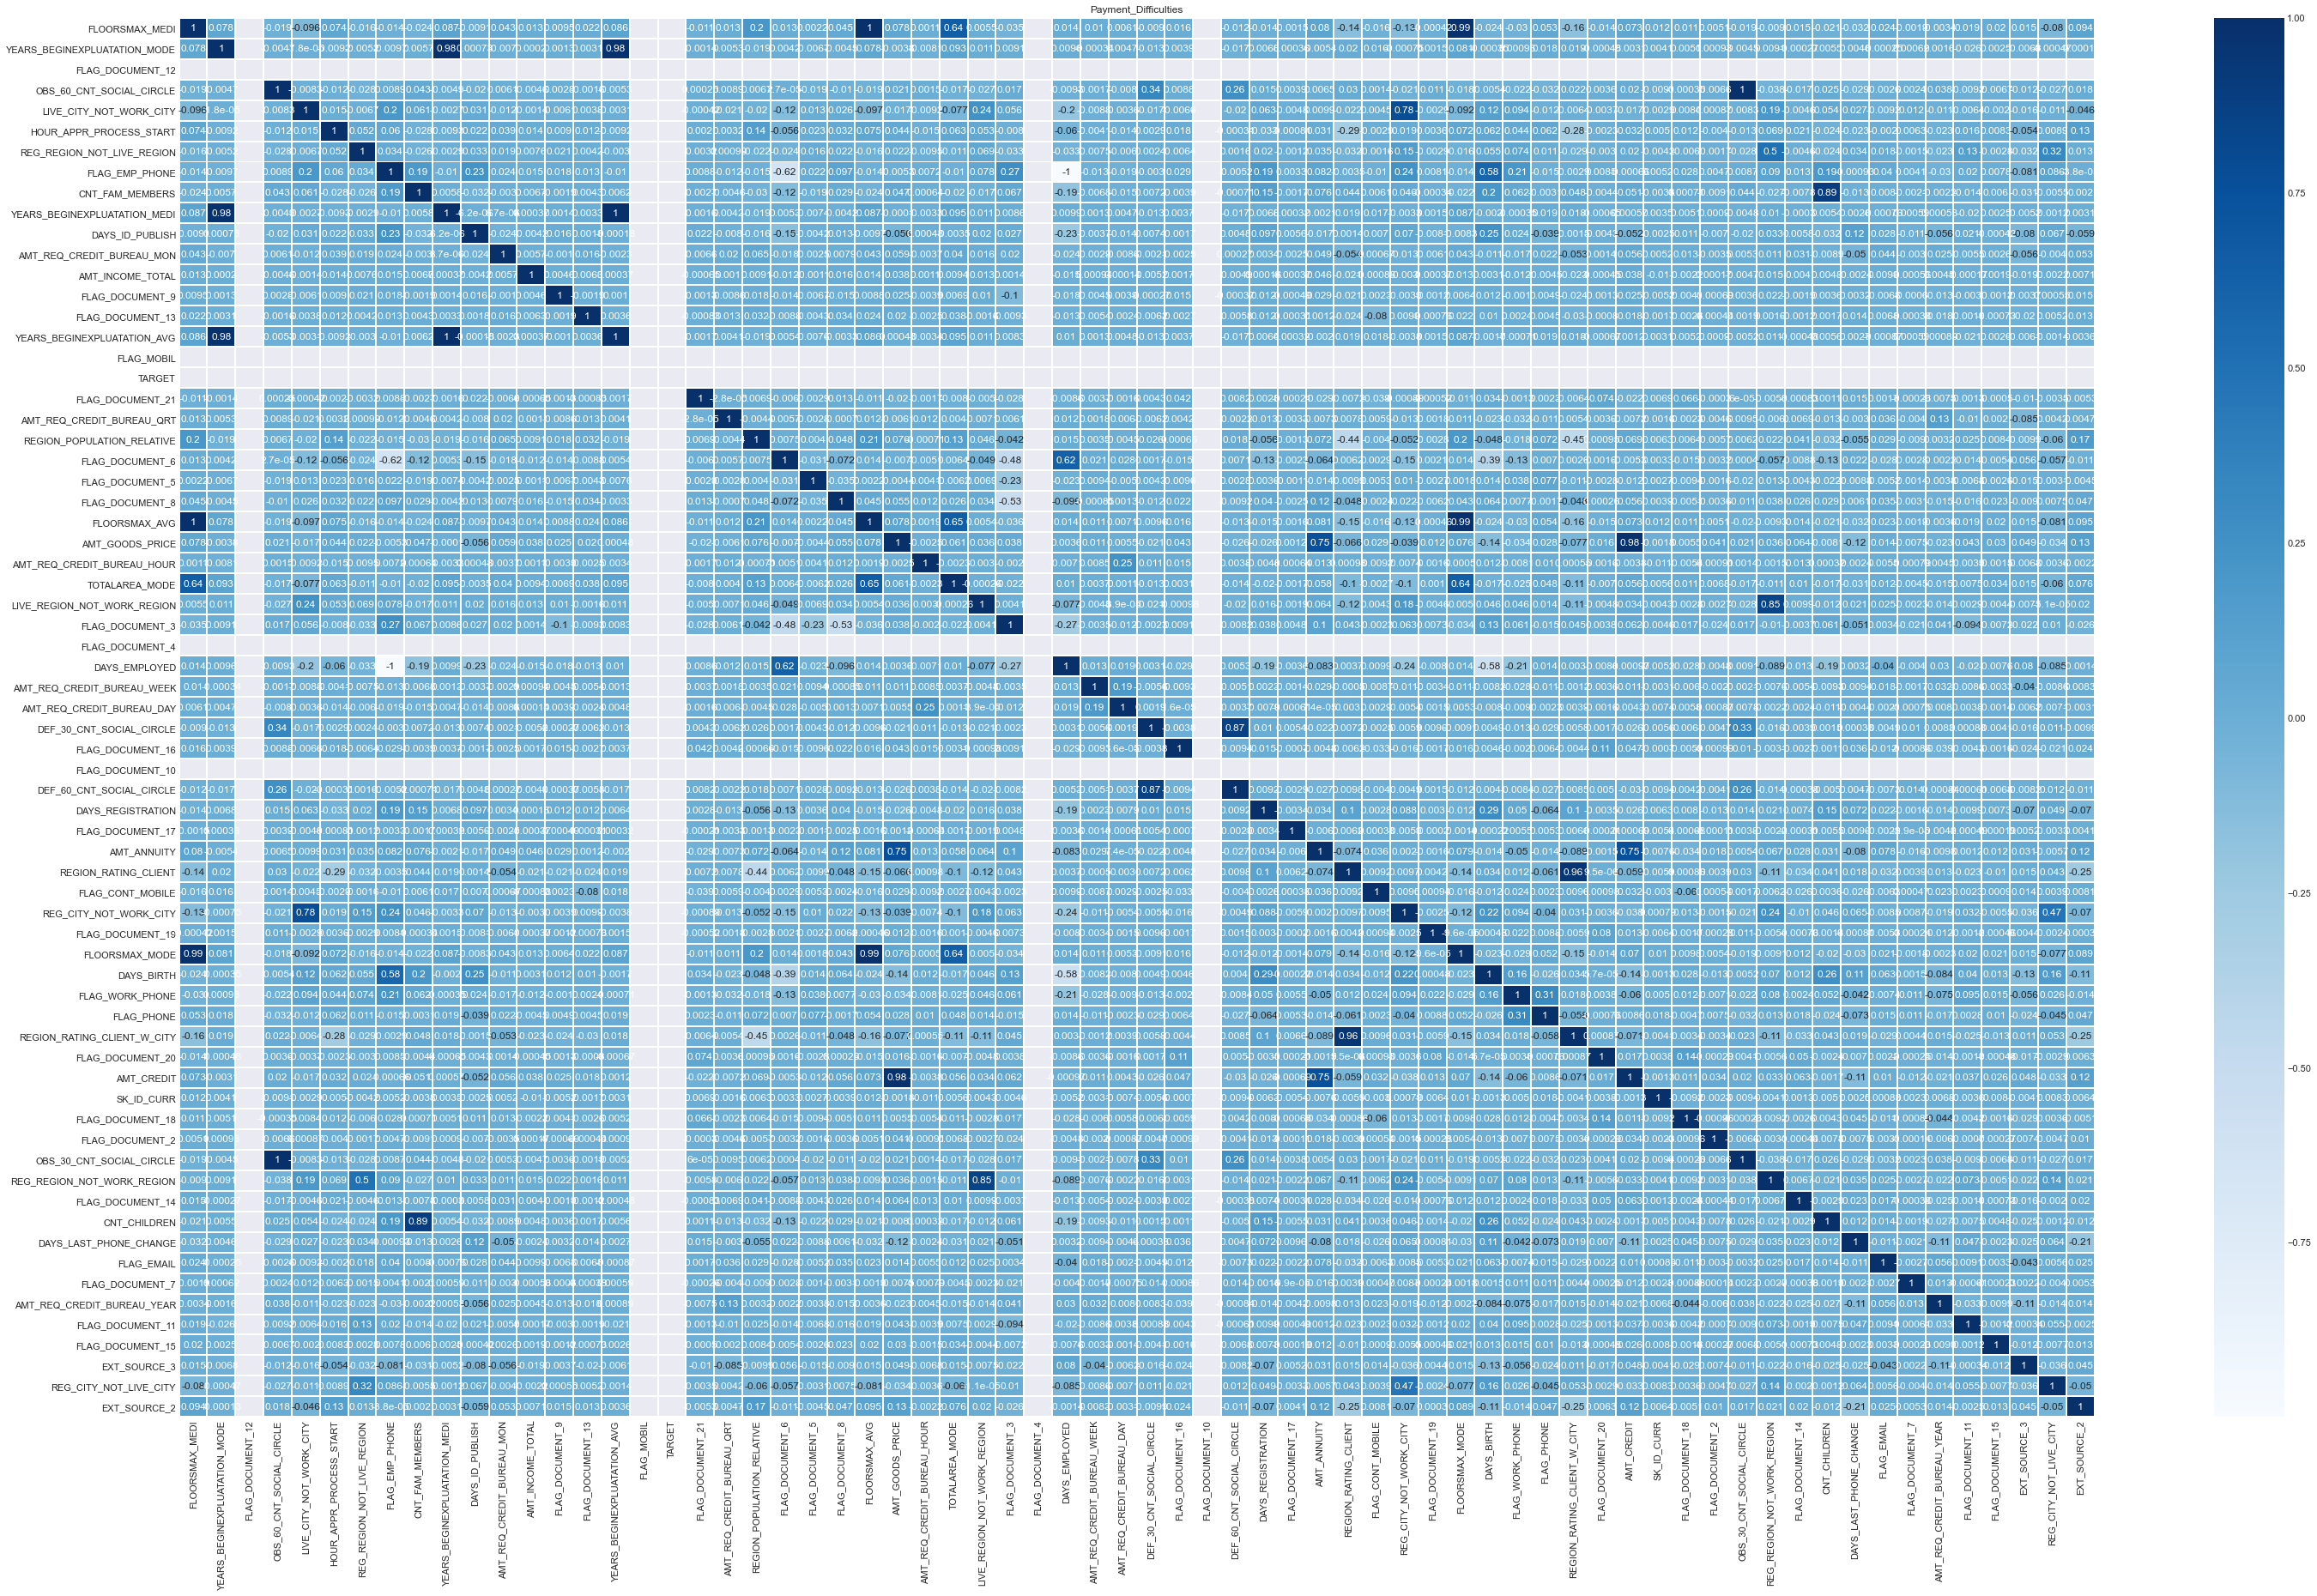

In [119]:
plt.figure(figsize=(50,30))
sns.heatmap(df1_paydiff.corr(),cmap="Blues",annot=True,linewidth=1)
plt.title('Payment_Difficulties')
plt.show()

**Top 10 correlations for all other cases**

In [120]:
df1_Other = df1_allother[x]

In [121]:
df1_Other_Corr = df1_Other.corr().abs()
df1_Other_Corr = df1_Other_Corr.unstack().sort_values(ascending = False)

print(df1_Other_Corr.head(200))

FLOORSMAX_MEDI                FLOORSMAX_MEDI                  1.000000
FLAG_DOCUMENT_16              FLAG_DOCUMENT_16                1.000000
AMT_REQ_CREDIT_BUREAU_WEEK    AMT_REQ_CREDIT_BUREAU_WEEK      1.000000
DAYS_EMPLOYED                 DAYS_EMPLOYED                   1.000000
FLAG_DOCUMENT_4               FLAG_DOCUMENT_4                 1.000000
FLAG_DOCUMENT_3               FLAG_DOCUMENT_3                 1.000000
LIVE_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION     1.000000
TOTALAREA_MODE                TOTALAREA_MODE                  1.000000
AMT_REQ_CREDIT_BUREAU_HOUR    AMT_REQ_CREDIT_BUREAU_HOUR      1.000000
AMT_GOODS_PRICE               AMT_GOODS_PRICE                 1.000000
FLOORSMAX_AVG                 FLOORSMAX_AVG                   1.000000
FLAG_DOCUMENT_8               FLAG_DOCUMENT_8                 1.000000
FLAG_DOCUMENT_5               FLAG_DOCUMENT_5                 1.000000
FLAG_DOCUMENT_6               FLAG_DOCUMENT_6                 1.000000
REGION

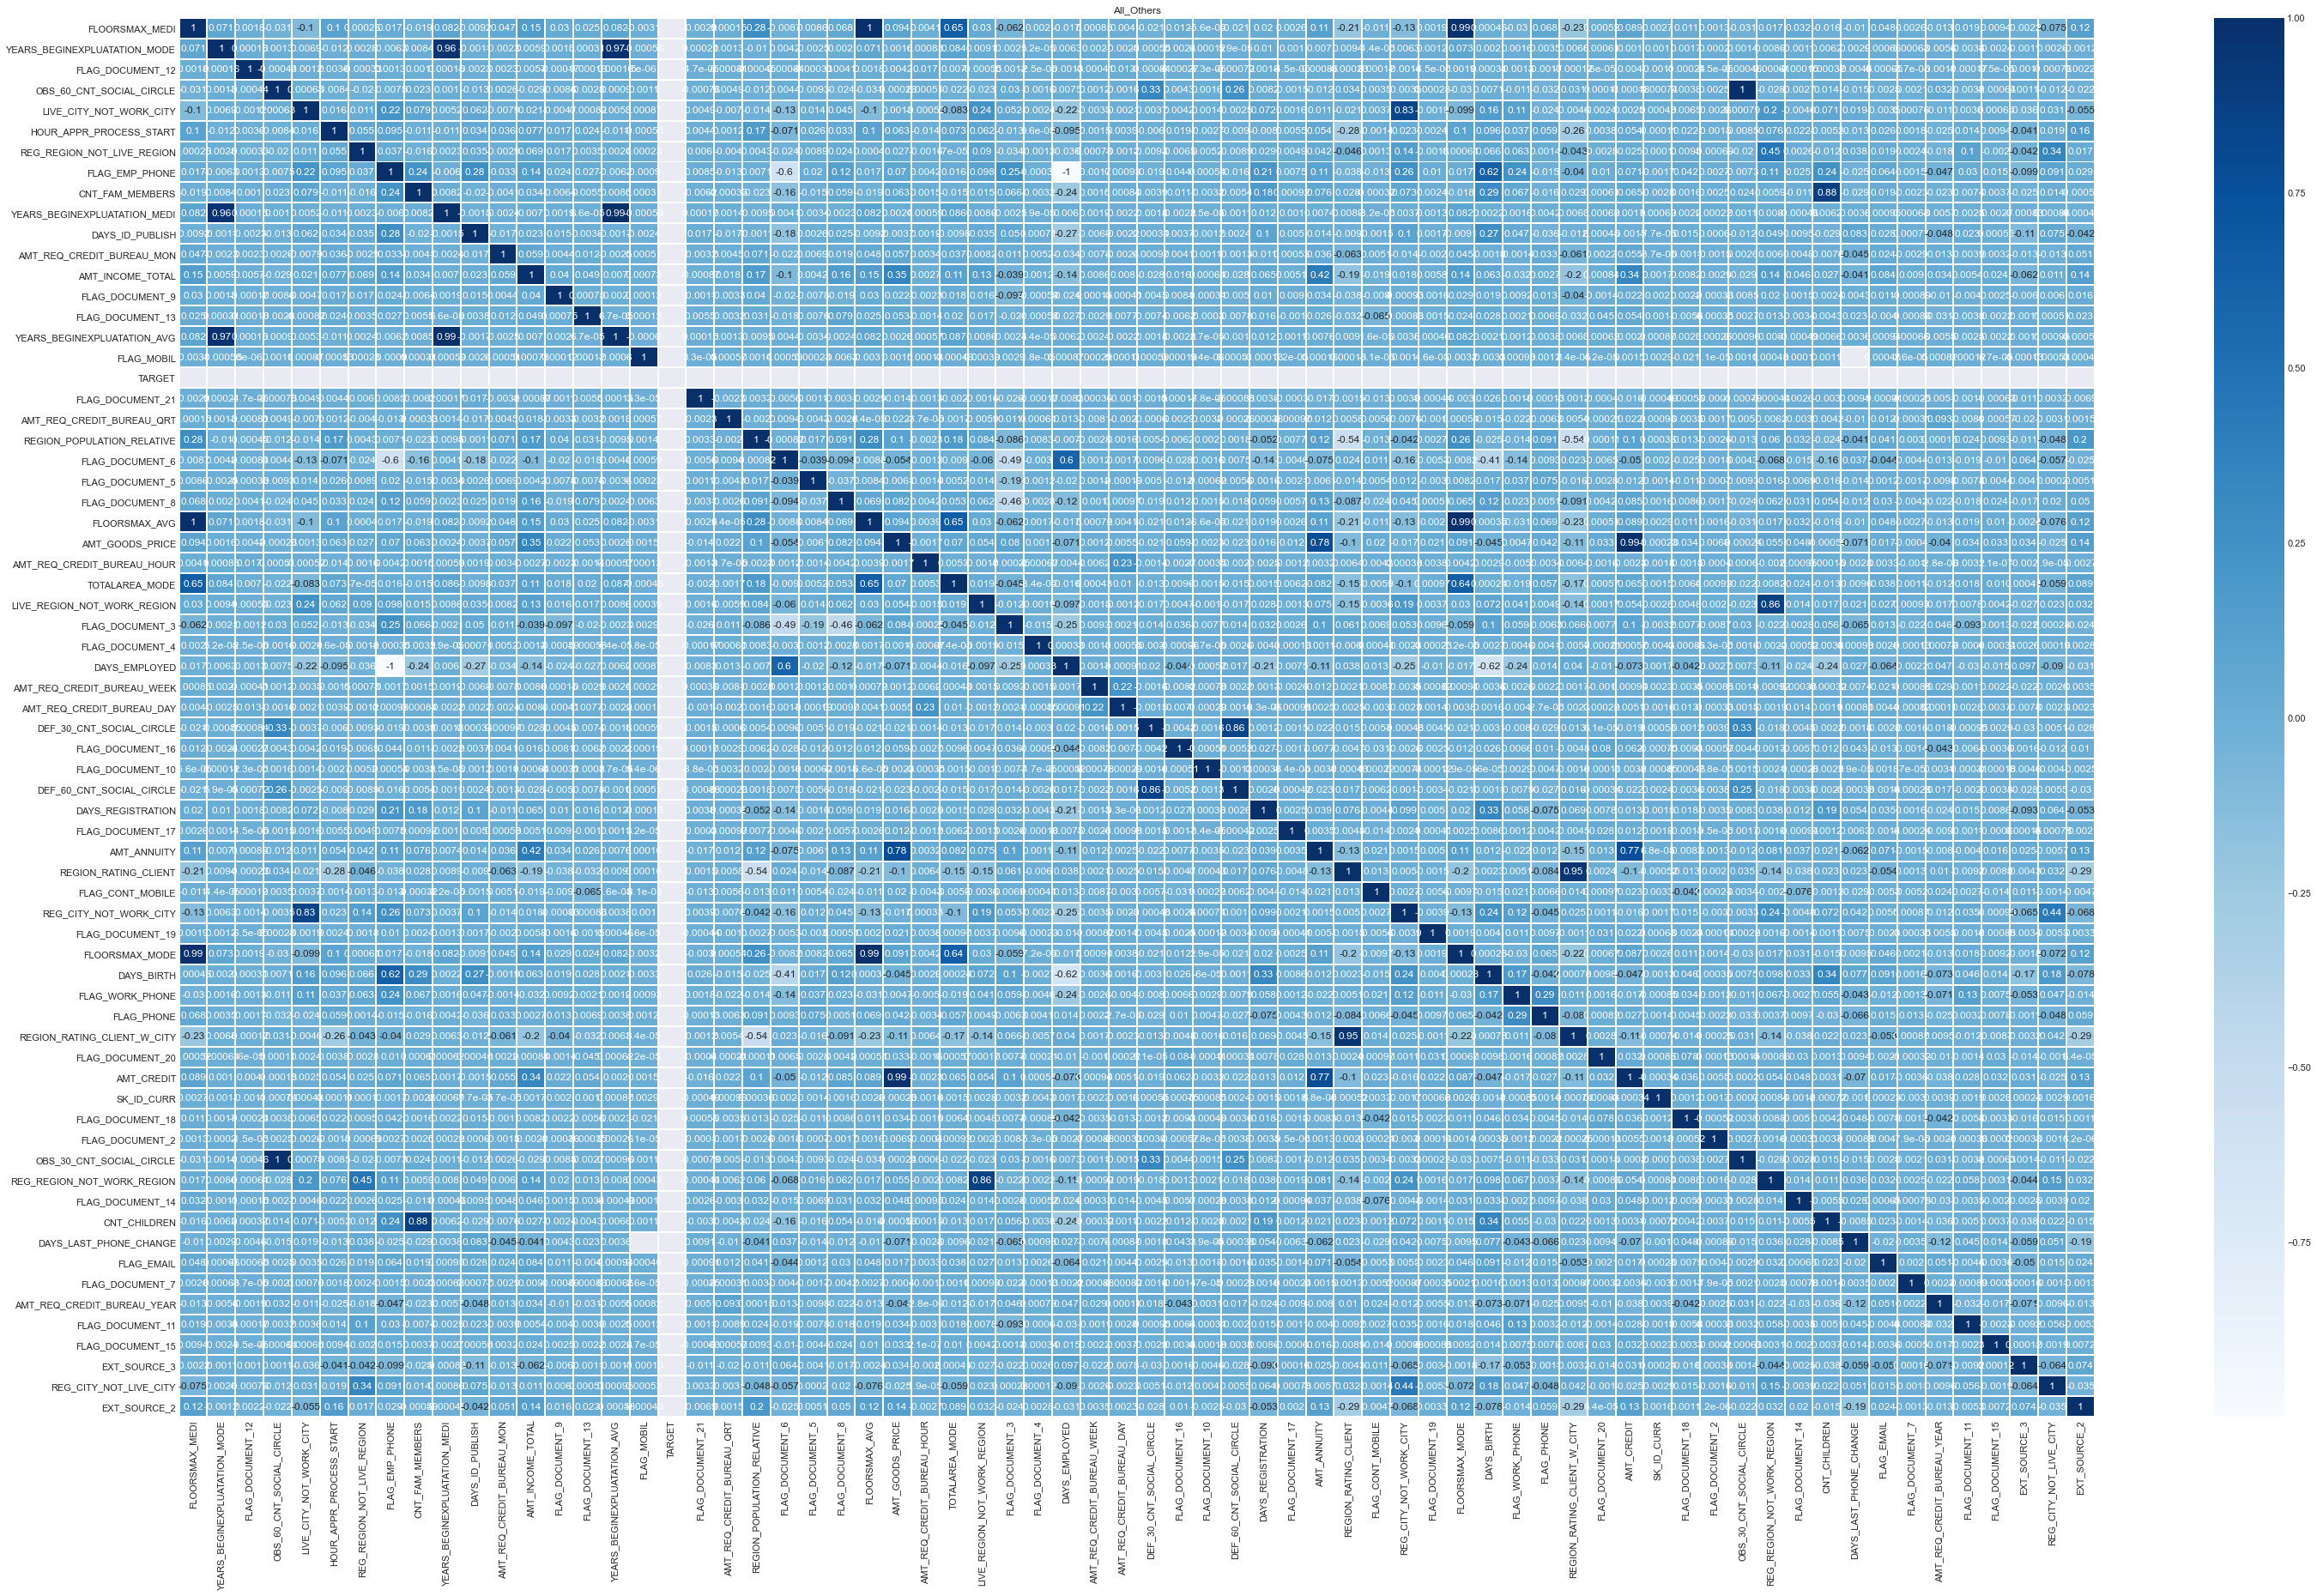

In [122]:
plt.figure(figsize=(50,30))
sns.heatmap(df1_Other.corr(), cmap="Blues", annot=True,linewidth=1)
plt.title('All_Others')
plt.show()

#### Top 10 correlations (Relevant columns) - All Others

Column 1|Column 2|Correlation|
--------|--------|-----------|
AMT_GOODS_PRICE|AMT_CREDIT|0.987022
REGION_RATING_CLIENT_W_CITY|REGION_RATING_CLIENT|0.950149
CNT_FAM_MEMBERS|CNT_CHILDREN|0.878571
AMT_ANNUITY|AMT_GOODS_PRICE|0.776421
AMT_CREDIT|AMT_ANNUITY|0.771297
AMT_GOODS_PRICE|AMT_INCOME_TOTAL|0.349426
AMT_INCOME_TOTAL|AMT_CREDIT|0.342799
CNT_CHILDREN|DAYS_BIRTH|0.336966
EXT_SOURCE_2|REGION_RATING_CLIENT|0.291350
DAYS_EMPLOYED|CNT_CHILDREN|0.243356

#### 💡 Observation (for correlations in payment difficulties and all others)
- The highest correlation between 2 variables for customers with payment difficulties and the rest is goods price amount and credit amount.
- The credit score (from ext source 2) of an applicant has a strong correlation with the rating of the region where the client lives. It has  a slightly stronger correlation in those who don’t have payment difficulties (0.29) as opposed to those who have payment difficulties (0.25).
- Goods price amount and total income are more strongly correlated in all the other cases as compared to payment difficulties. This could mean that those who don’t have payment difficulties evaluate their income and the goods they want to buy in a better way.
- The  region_rating_client and region_rating_client_w_city are directly proportional to each other and have higher positive correlation for customers without payment difficulties as opposed to customers with payment difficulties

## 6. Data cleaning - Previous Application

#### 6.1. Checking if each column is of right Data Type

In [123]:
# Number or Rows and Columns in the Dataset
print('Number of Rows in Dataset - application_data.csv --> ',df2.shape[0])
print('Number of Columns in Dataset - application_data.csv --> ',df2.shape[1])

Number of Rows in Dataset - application_data.csv -->  1670214
Number of Columns in Dataset - application_data.csv -->  37


In [124]:
# info & Datatypes of the columns in the Dataset
df2.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [125]:
# Describe
df2.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

#### 6.2. Analysing the Missing values

In [126]:
# Missing Values % in Dataset Application data
prcnt_missing(df2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

#### 6.3. Dropping the Columns with missing values

In [127]:
print(prcnt_missing(df2)[prcnt_missing(df2) > 50])
print("Number of Columns ",prcnt_missing(df2)[prcnt_missing(df2) > 50].count())

AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
dtype: float64
Number of Columns  4


In [128]:
drop_cols1 = list(prcnt_missing(df2)[prcnt_missing(df2) > 50].index)
print(drop_cols1)

['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']


In [129]:
# Dropping columns from drop_cols1 list from the Dataset Previous_Application_data

df2.drop(columns=drop_cols1,inplace=True)

# Checking the shape of the Dataset after dropping the columns

print('''Number of columns in dataset df2 after dropping columns
:''',df2.shape[1])

Number of columns in dataset df2 after dropping columns
: 33


#### 6.4. Imputing the Missing Values

In [130]:
# Missing values for the remaining columns
prcnt_missing(df2)[prcnt_missing(df2)>0].sort_values(ascending=False)

NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
PRODUCT_COMBINATION           0.02
dtype: float64

**NAME_TYPE_SUITE**

In [131]:
# Since the Name_Type_Suite is a categorical column, 
# Imputing the Missing value with the Mode value

df2['NAME_TYPE_SUITE'] = df2['NAME_TYPE_SUITE'].fillna(df2['NAME_TYPE_SUITE'].mode()[0])

In [132]:
df2['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      1329375
Family              213263
Spouse, partner      67069
Children             31566
Other_B              17624
Other_A               9077
Group of people       2240
Name: NAME_TYPE_SUITE, dtype: int64

In [133]:
# checking the missing values

df2.NAME_TYPE_SUITE.isnull().sum()

0

**PRODUCT_COMBINATION**

Since the Column PRODUCT_COMBINATION is categorical in Nature, The missing values can be imputed using the Mode value

In [134]:
df2['PRODUCT_COMBINATION'].value_counts(normalize=True)*100

Cash                              17.126503
POS household with interest       15.786996
POS mobile with interest          13.214817
Cash X-Sell: middle                8.616430
Cash X-Sell: low                   7.799898
Card Street                        6.741970
POS industry with interest         5.918612
POS household without interest     4.964943
Card X-Sell                        4.825651
Cash Street: high                  3.571480
Cash X-Sell: high                  3.551239
Cash Street: middle                2.075493
Cash Street: low                   2.026148
POS mobile without interest        1.442150
POS other with interest            1.429993
POS industry without interest      0.754670
POS others without interest        0.153006
Name: PRODUCT_COMBINATION, dtype: float64

In [135]:
df2.PRODUCT_COMBINATION.mode()[0]

'Cash'

In [136]:
df2['PRODUCT_COMBINATION'] = df2['PRODUCT_COMBINATION'].fillna(df2['PRODUCT_COMBINATION'].mode()[0])

In [137]:
df2['PRODUCT_COMBINATION'].value_counts()

Cash                              286336
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [138]:
df2.PRODUCT_COMBINATION.isnull().sum()

0

**AMT_ANNUITY**

Since the Column AMT_ANNUITY is Numerical in Nature and has certain outliers in the data, The missing values can be imputed using the Median value

In [139]:
df2['AMT_ANNUITY'].value_counts(normalize=True)*100

2250.000     2.454970
11250.000    1.076597
6750.000     1.035610
9000.000     0.962727
22500.000    0.917041
               ...   
9312.795     0.000077
12974.400    0.000077
58503.870    0.000077
31002.030    0.000077
9648.270     0.000077
Name: AMT_ANNUITY, Length: 357959, dtype: float64

<AxesSubplot:>

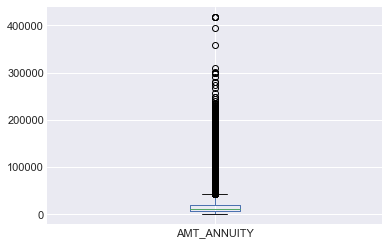

In [140]:
df2['AMT_ANNUITY'].plot.box()

In [141]:
df2['AMT_ANNUITY'].median()

11250.0

In [142]:
df2['AMT_ANNUITY'] = df2['AMT_ANNUITY'].fillna(df2['AMT_ANNUITY'].median())

In [143]:
df2['AMT_ANNUITY'].isnull().sum()

0

**AMT_GOODS_PRICE**

Since the Column AMT_GOODS_PRICE is Numerical in Nature and has certain outliers in the data, The missing values can be imputed using the Median value

In [144]:
df2['AMT_GOODS_PRICE'].value_counts(normalize=True)*100

45000.00     3.723129
225000.00    3.389821
135000.00    3.165411
450000.00    3.029970
90000.00     2.285905
               ...   
431977.50    0.000078
309064.50    0.000078
142870.50    0.000078
34421.40     0.000078
84384.27     0.000078
Name: AMT_GOODS_PRICE, Length: 93885, dtype: float64

<AxesSubplot:>

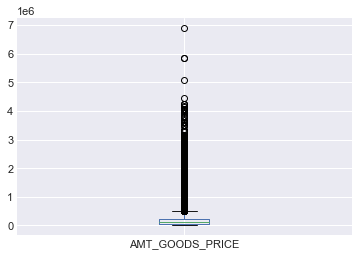

In [145]:
df2['AMT_GOODS_PRICE'].plot.box()

In [146]:
df2['AMT_GOODS_PRICE'].median()

112320.0

In [147]:
df2['AMT_GOODS_PRICE'] = df2['AMT_GOODS_PRICE'].fillna(df2['AMT_GOODS_PRICE'].median())

In [148]:
df2['AMT_GOODS_PRICE'].isnull().sum()

0

**CNT_PAYMENT**

Since the Column CNT_PAYMENT is Numerical in Nature and has certain outliers in the data, The missing values can be imputed using the Median value

<AxesSubplot:>

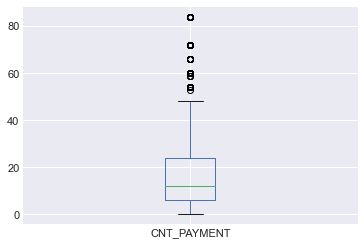

In [149]:
df2['CNT_PAYMENT'].plot.box()

In [150]:
df2['CNT_PAYMENT'].median()

12.0

In [151]:
df2['CNT_PAYMENT'] = df2['CNT_PAYMENT'].fillna(df2['CNT_PAYMENT'].median())

In [152]:
df2['CNT_PAYMENT'].isnull().sum()

0

**Replacing the XNA & XAP values with NAN**

In [153]:
# Replacing all the XNA and XAP values with NAN values
df2 = df2.replace('XNA',np.NaN)
df2 = df2.replace('XAP',np.NaN)

### 7. Data Analysis for Previous Dataset

**7.1 Univariate**

#### 7.1.1 Name Contract Type

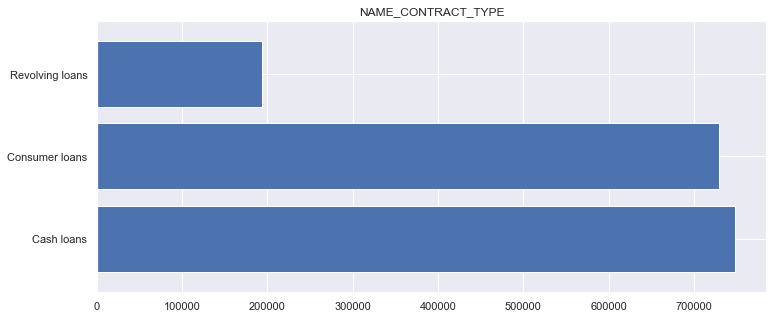

In [154]:
Horizontal_bar(df2,'NAME_CONTRACT_TYPE')

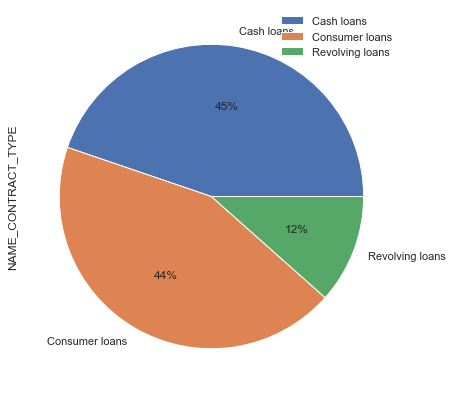

In [155]:
fig = plt.figure(figsize=(15,7))
df2.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct = "%1.0f%%")
plt.legend()
plt.show()

#### 💡 Observation:
- The number of customers who have requested for **cash loans** is the highest among the Total Applications, followed by consumer loans and revolving loans.

#### 7.1.2 NAME_PAYMENT_TYPE

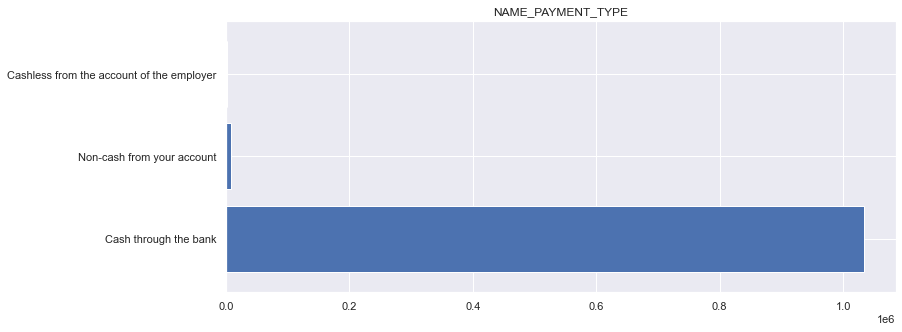

In [156]:
Horizontal_bar(df2,'NAME_PAYMENT_TYPE')

#### 💡 Observation:
- The number of customers who have opted for **Cash through the Bank** Payment Type is the highest among the total applications.
- The number of customers who have opted for **Cashless from the account of the employer** Payment Type is the least.

#### 7.1.3 NAME_CLIENT_TYPE

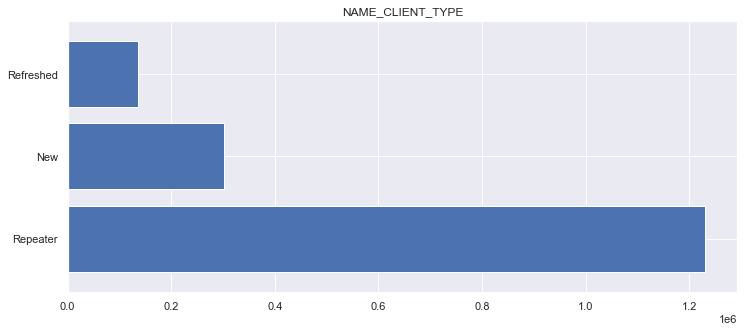

In [157]:
Horizontal_bar(df2,'NAME_CLIENT_TYPE')

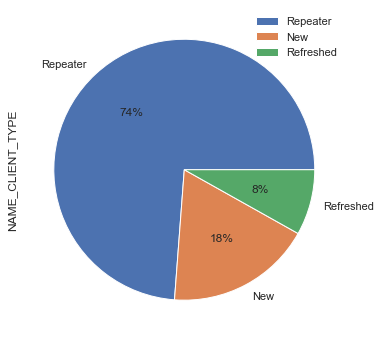

In [158]:
fig = plt.figure(figsize=(20,6))
df2.NAME_CLIENT_TYPE.value_counts().plot.pie(autopct = "%1.0f%%")
plt.legend()
plt.show()

#### 💡 Observation:
- The maximum percentage of applicants are **repeaters** with a 74% share followed by **New Applicants**.

#### 7.1.4 NAME_CASH_LOAN_PURPOSE

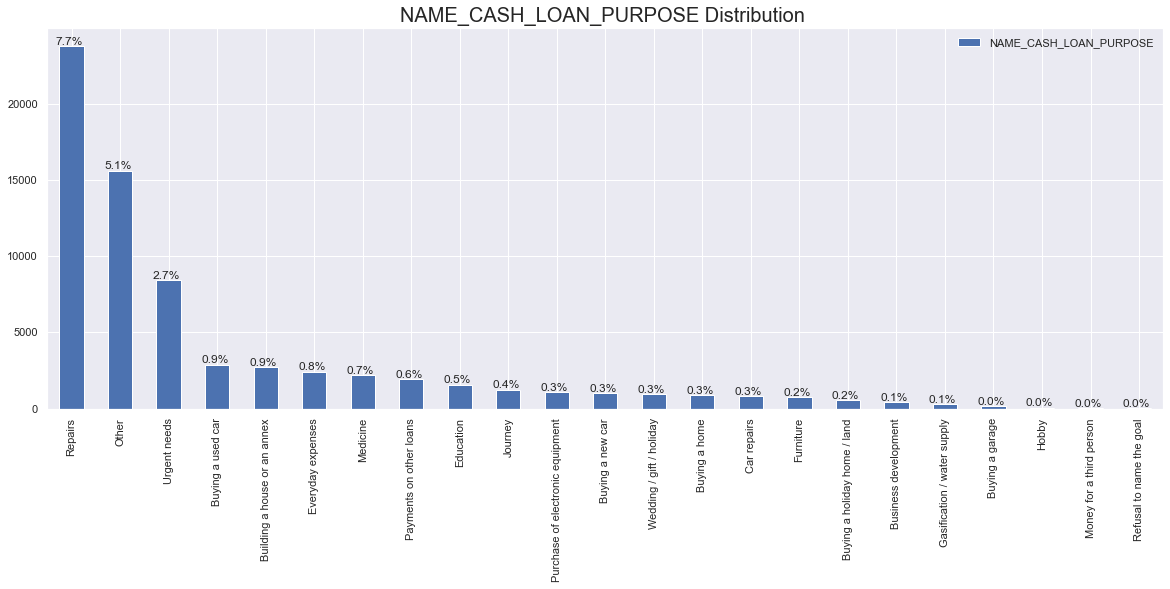

In [159]:
countplot(df2,'NAME_CASH_LOAN_PURPOSE')

#### 💡 Observation:
- For maximum number of applicants, the purpose of applying for loan is **Repairs**.

#### 7.1.5 NAME_CONTRACT_STATUS

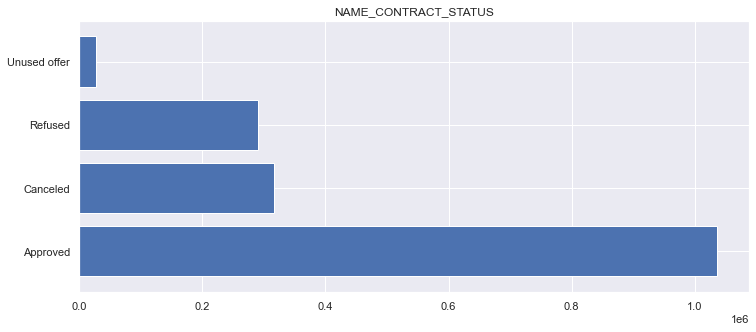

In [160]:
Horizontal_bar(df2,'NAME_CONTRACT_STATUS')

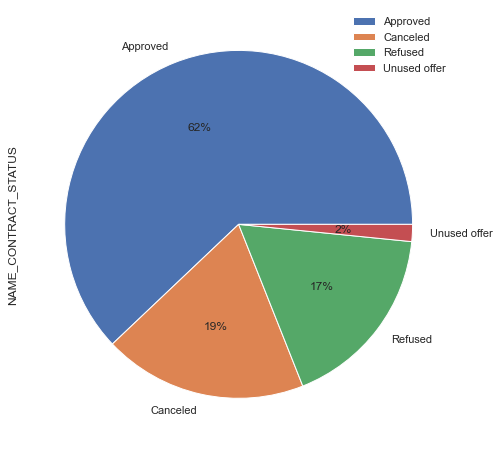

In [161]:
fig = plt.figure(figsize=(20,8))
df2.NAME_CONTRACT_STATUS.value_counts().plot.pie(autopct = "%1.0f%%")
plt.legend()
plt.show()

#### 💡 Observation:
- Majority of the previous applications have been **approved**. This is the followed by the proportion of applicants who cancelled their applications sometime during approval.

#### 7.1.6 CODE_REJECT_REASON

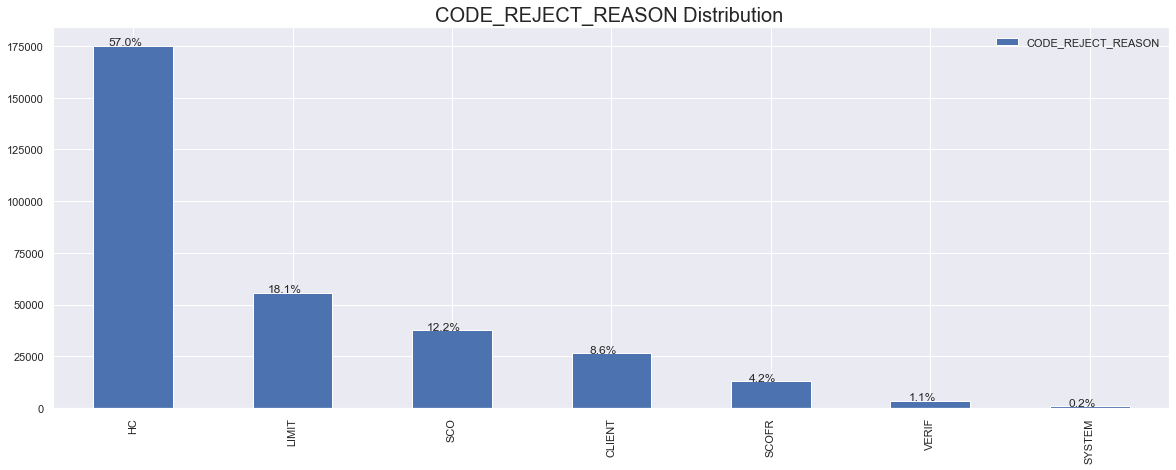

In [162]:
countplot(df2,'CODE_REJECT_REASON')

#### 💡 Observation:
- The top 3 reasons for loan rejection are HC, LIMIT and SCO.

#### 7.1.7 Client_Type v/s Credit Amount v/s Contract status

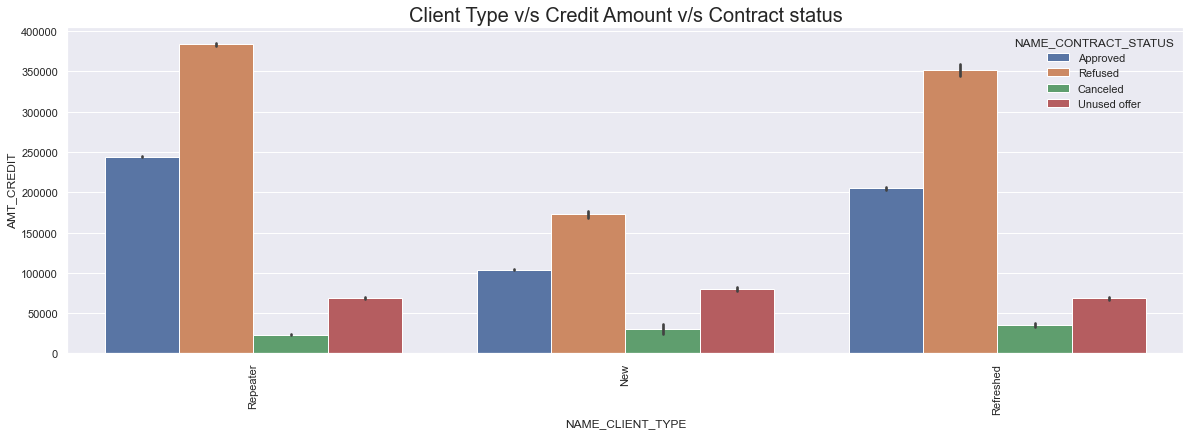

In [163]:
plt.figure(figsize = (20,6))
sns.barplot(x=df2['NAME_CLIENT_TYPE'],y=df2['AMT_CREDIT'],hue=df2['NAME_CONTRACT_STATUS'])
plt.xticks(rotation = 90)
plt.title('Client Type v/s Credit Amount v/s Contract status',fontsize=20)
plt.show()

#### 💡 Observation:
- Among the approved and refused loans of all types of customers, repeat customers had the highest average amount of credit.
- We observe that the new customers had the least average amount of credit, among all the approved and refused loans of all types of customers.

### 8. Merging the Datasets

#### 8.1 Merging

In [ ]:
#Merging the datasets

Merged_Data = pd.merge(df1, df2, how='inner', on=['SK_ID_CURR'])
Merged_Data.head()

In [ ]:
# Checking the shape of Merged_Data

Merged_Data.shape

In [ ]:
#Checking information of all the columns in Merged_Data

Merged_Data.info('all')

#### 8.2 Data Analysis

In [ ]:
# Defining function for plotting graphs

def Merged_Plot(Var_1,Var_2):

    plt.style.use('ggplot')
    sns.despine
    Merged = Merged_Data.pivot_table(values='SK_ID_CURR', 
                      index=Var_1,
                      columns=Var_2,
                      aggfunc='count')
    Merged=Merged.div(Merged.sum(axis=1),axis='rows')*100
    sns.set()
    Merged.plot(kind='bar',figsize=(15,5))
    plt.title(f'Effect Of {Var_1} on Loan Approval')
    plt.xlabel(f'{Var_1}')
    plt.ylabel(f'{Var_2}%')
    plt.show()

**Flag_Own_Realty v/s Name_Contract_Status**

In [ ]:
Merged_Plot('FLAG_OWN_REALTY','NAME_CONTRACT_STATUS')

#### 💡 Observation:
- There is not a significant difference in approval or rejection percentage for customers who own realty and consumers who don't own realty currently.

**Target v/s Name_Contract_Status**

In [ ]:
Merged_Plot('TARGET','NAME_CONTRACT_STATUS')

#### 💡 Observation:
- The percentage of customers who have payment difficulties who have had their loans approved is lower than the percentage of those who fall in all the other cases.

**Gender v/s Name_Contract_Status**

In [ ]:
Merged_Plot('NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS')

#### 💡 Observation:
- The proportion of approved applications is similar (with slight differences) across all housing types. Same is the case for cancelled and refused applications.

**Education_Type v/s Name_Contract_Status**

In [ ]:
Merged_Plot('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

#### 💡 Observation:
- The maximum percentage of approved applications belong to those with an academic degree. There isn't a significant difference in the percentage of approved applications across the rest of the education types.

### 9. Driver Variables

- **Education Type** – Applicants with an academic degree are least likely to default while those with an education level up to lower secondary are most likely to default.
- **Occupation** – Applicants who are low-skill labourers are most likely to default while those who are accountants are least likely to default.
- **Age** – Applicants in the age bracket 20-25 are likely to have the most payment difficulties while those above 65 are likely to have the least.
- **Employment experience** – Those with 0-5 years of experience are most likely to default while those with 40-45 years of experience are least likely.
- **Type of housing** – Those with an office apartment are the least likely to default while those with a rented apartment or those living with their parents are most likely to default.
- **Income Range** – Those with an income ranging between 1-2L are most likely to default while those in the income range 7-8L are least likely to default.